# In What Electoral System Would Donald Trump Have Won The 2020 US Election?

## Introduction

The Electoral College system has been a concrete part of the US presidential election since the founding of the country. In this system, the citizens of each state cast their votes for their choice of electors, who will cast their votes for the presidential candidates. The number of electors of each state is the sum of the number of Senates and the number of Representatives. The Electoral College consists of 538 electors in total, and each elector's vote is counted as 1 vote in the general election. In the end, the candidate who wins over the majority - which means 270 votes - wins the election. The system was created out of good intention to balance the power of small states and large states, however, criticism is getting louder after several instances in which the winner of the popular vote did not win the election due to the outcome of the Electoral College vote. This has led to questions about whether the system accurately represents the will of the US citizens and if there might be a better way to elect the President.

As the fact is that Joe Biden won in the 2020 election, the goal of the paper is to find out whether there exists any electoral system which would have allowed Donald Trump to win in the 2020 election based the original votes.

The proposed electoral systems in this paper ALL have a common presumption, that the voting unit (county or state) which will be responsible to cast ALL of its votes to one candidate. This concept, known as the "winner-take-all" principle, is similar to the existing voting system in 48 of the 50 states and Washington, D.C. in the US.

As data analysis shows that Republican voters are disproportionally located in rural areas and small cities, the 4 electoral systems proposed in the paper all put higher focus on the number of voting unit (county or state), instead of the population of voting unit (county or state). Therefore, 3 of 4 electoral systems makes Donald to win in the 2020 election.

### Variables
- Input $X_1$: Raw votes of DEM in counties
- Input $X_2$: Raw votes of REP in counties
- Input $X_3$: Raw total votes in counties
-- $X_1$, $X_2$ and $X_3$ are all vectors, each component $X_{1,i}$, $X_{2,i}$, $X_{3,i}$, where i $\in$ [1,n], represents the raw votes of DEM, the raw votes of REP and the raw total votes in a specific county, n is the count of counties.
- Output $Y_1$: Fabricated Votes of DEM in US
- Output $Y_2$: Fabricated Votes of REP in US

* **Electoral System I - Elect By County**
Each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes.
According to the Electoral System I,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > $X_1$), X_{3,i}, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), X_{3,i}, 0) $$

* **Electoral System II - Elect By County**
Each county has one vote, it casts its vote on the party (candidate) that won the majority of votes.**
According to the Electoral System II,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > X_{2,i}), 1, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), 1, 0) $$

* **Electoral System III - Elect By State**
Each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties.
According to the Electoral System III,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), TVofState_{i}, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), TVofState_{i}, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} ((if (X_{1,j} < X_{2,j}), 1, 0) $$

$$ TVofState_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} X3_{j} $$

* **Electoral System IV - Elect By State**
Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties.
According to the Electoral System IV,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), 1, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), 1, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} < X_{2,j}), 1, 0) $$

## Data Cleaning/Loading

### Datasets used in this article
1. Kaggle: US Election 2020
    The information includes, states, counties, candidates, parties, and their respective votes.
2. SimpleMaps: US cities except for District of Columbia
    The information includes counties' latitude, and longitude.
3. Census Reporter: District of Columbia
    The information includes 8 Wards of District of Columbia for their latitude, and longitude.
    Note: This information was searched manually, and is manually entered onto the second dataset.

### Data Loading

In [526]:
import pandas as pd
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

*Note a wrong data in president_county_candidate.csv: Maine, Glenwood Plt., Donald Trump, corrected based on
https://www.nytimes.com/interactive/2020/11/03/us/elections/results-maine.html

In [527]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [528]:
df_pc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county.csv')
df_pc.head()

,state,county,current_votes,total_votes,percent
0,Delaware,Kent County,87025,87025,100
1,Delaware,New Castle County,287633,287633,100
2,Delaware,Sussex County,129352,129352,100
3,District of Columbia,Ward 1,41681,41681,100
4,District of Columbia,Ward 2,32881,32881,100


In [529]:
df_ps = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_state.csv')
df_ps.head()

,state,total_votes
0,Delaware,504010
1,District of Columbia,344356
2,Florida,11067456
3,Georgia,4997716
4,Hawaii,574469


In [530]:
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')
df_geo.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8586888,4576.0,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6076316,4945.0,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5910669,1522.0,shape,False,True,America/Chicago,1,75098 75287 75230 75231 75236 75237 75235 7525...,1840019440


In [531]:
pd.set_option('display.max_columns', None)

### Data Cleaning

1. Remove the rows of US Election 2020 where the candidate did not win.

In [532]:
df['county'] = df['county'].str.replace(' County', '')
df_pc['county'] = df_pc['county'].str.replace(' County', '')

2. Match the geographical coordinates with votes.



In [533]:
df_copy = df.copy()
df_pc_copy = df_pc.copy()

df_geo_copy = df_geo.copy()
df_geo_copy.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population', 'density'], axis = 1, inplace = True)
df_geo_copy.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_copy.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_geo_pop = df_geo.copy()
df_geo_pop.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'], axis = 1, inplace = True)
df_geo_pop.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_pop.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)

df_county_statistics = pd.merge(df_copy, df_geo_copy, on=['county', 'state'], how = 'left')
df_pc_copy.drop(['total_votes', 'percent'], axis = 1, inplace = True)
df_county = df_county_statistics.copy()
df_county.drop(df_copy[df_copy['won'] == False].index, inplace = True)
df_county.reset_index(inplace=True)
df_county['total_votes'] = df_pc_copy['current_votes']
df_county.drop(['index'], axis = 1, inplace = True)
df_county.head()

,state,county,candidate,party,total_votes,won,lat,lng
0,Delaware,Kent,Joe Biden,DEM,87025,True,39.1610,-75.5202
1,Delaware,New Castle,Joe Biden,DEM,287633,True,39.7415,-75.5416
2,Delaware,Sussex,Donald Trump,REP,129352,True,38.9091,-75.4227
3,District of Columbia,Ward 1,Joe Biden,DEM,41681,True,38.9072,-77.0369
4,District of Columbia,Ward 2,Joe Biden,DEM,32881,True,38.9063,-77.0340


Calculating data for summary statistics table. ->

In [534]:
df_county_won = df_county.copy()
df_county_won.drop(df_county_won[df_county_won['candidate'] != 'Donald Trump'].index, inplace = True)
df_county_won.drop(['lat', 'lng'], axis = 1, inplace = True)
df_county_won.rename(columns={"total_votes": "county_total_votes"}, inplace = True)
df_county_won = pd.merge(df_county_won, df_copy, on=['county', 'state', 'candidate', 'party', 'won'], how='left')
df_county_won.rename(columns={"total_votes": "won_votes"}, inplace = True)
df_county_won = df_county_won[['state', 'county', 'candidate', 'party', 'won', 'won_votes', 'county_total_votes']]
df_county_won['share of votes in the winning counties'] = \
    df_county_won['won_votes'] / df_county_won['county_total_votes']
df_county_won.head()

,state,county,candidate,party,won,won_votes,county_total_votes,share of votes in the winning counties
0,Delaware,Sussex,Donald Trump,REP,True,71230,129352,0.550668
1,Florida,Baker,Donald Trump,REP,True,11911,14059,0.847215
2,Florida,Bay,Donald Trump,REP,True,66097,93024,0.710537
3,Florida,Bradford,Donald Trump,REP,True,10334,13632,0.758069
4,Florida,Brevard,Donald Trump,REP,True,207883,360764,0.576230


In [535]:
df_county_lost = df_county_statistics.copy()
df_county_lost.drop(df_copy[df_copy['won'] == True].index, inplace = True)
df_county_lost.drop(df_county_lost[df_county_lost['candidate'] != 'Donald Trump'].index, inplace = True)
df_county_lost.drop(['lat', 'lng'], axis = 1, inplace = True)
df_county_lost.reset_index(inplace=True)
df_county_lost.rename(columns={"total_votes": "won_votes"}, inplace = True)
df_county_lost = pd.merge(df_county_lost, df_pc_copy, on = ['state', 'county'], how = 'left')
df_county_lost.rename(columns={"current_votes": "county_total_votes"}, inplace = True)
df_county_lost.drop(['index'], axis = 1, inplace = True)
df_county_lost = df_county_lost[['state', 'county', 'candidate', 'party', 'won', 'won_votes', 'county_total_votes']]
df_county_lost['share of votes in the losing counties'] =\
    df_county_lost['won_votes'] / df_county_lost['county_total_votes']
df_county_lost.head()

,state,county,candidate,party,won,won_votes,county_total_votes,share of votes in the losing counties
0,Delaware,Kent,Donald Trump,REP,False,41009,87025,0.471232
1,Delaware,New Castle,Donald Trump,REP,False,88364,287633,0.307211
2,District of Columbia,Ward 1,Donald Trump,REP,False,1725,41681,0.041386
3,District of Columbia,Ward 2,Donald Trump,REP,False,2918,32881,0.088744
4,District of Columbia,Ward 3,Donald Trump,REP,False,3705,44231,0.083765


For Electoral System I and II, in which the county is the vote casting level, data cleaning is done. They share the same dataframe for plotting purposes.

For Electoral System III and IV, in which the state is the vote casting level, continue the following steps:

3. Calculate the number of counties won by each candidate in each state.

In [536]:
df_state = df_copy.groupby(["state", "candidate", "party"]).sum(numeric_only = True)
df_state.rename(columns={"won": "# of counties won"}, inplace = True)
df_state.index = [df_state.index.get_level_values(0),
                  df_state.index.get_level_values(1),
                  df_state.index.get_level_values(2)]
df_state = df_state.reset_index() \
       .sort_values(['state','# of counties won'], ascending=[True,False]) \
       .set_index(['state','party'])
df_state.drop(['total_votes'], axis = 1, inplace = True)
df_state.head()

candidate  # of counties won
state   party                                 
Alabama REP    Donald Trump                 54
        DEM       Joe Biden                 13
        WRI       Write-ins                  0
        LIB    Jo Jorgensen                  0
Alaska  REP    Donald Trump                 20

4. Keep the candidate of the highest voting only.

In [537]:
df_state1 = df_state.copy()
df_state1.reset_index(inplace=True)
df_state1.drop_duplicates(
  subset = ['state'],
  keep = 'first', inplace = True)
df_state1 = df_state1.reset_index(drop=True)
df_state1.head()

,state,party,candidate,# of counties won
0,Alabama,REP,Donald Trump,54
1,Alaska,REP,Donald Trump,20
2,Arizona,REP,Donald Trump,10
3,Arkansas,REP,Donald Trump,67
4,California,DEM,Joe Biden,35


5. Replace ALL candidates and parties' name by the winner of each state, because now all the votes of a state belongs to the winner.

In [538]:
df_state2 = df_county.copy()
df_state2.drop(['candidate'], axis = 1, inplace = True)
df_state2.drop(['party'], axis = 1, inplace = True)
df_state2 = pd.merge(df_state2, df_state1, on = 'state', how = 'left')
df_state2.head()

,state,county,total_votes,won,lat,lng,party,candidate,# of counties won
0,Delaware,Kent,87025,True,39.1610,-75.5202,DEM,Joe Biden,2
1,Delaware,New Castle,287633,True,39.7415,-75.5416,DEM,Joe Biden,2
2,Delaware,Sussex,129352,True,38.9091,-75.4227,DEM,Joe Biden,2
3,District of Columbia,Ward 1,41681,True,38.9072,-77.0369,DEM,Joe Biden,8
4,District of Columbia,Ward 2,32881,True,38.9063,-77.0340,DEM,Joe Biden,8


*Need to Improve*
*Some counties' latitude and longitude are still missing, will find other datasets to fill the vacancies.*

Summary statistics table for III and IV ->

In [539]:
df_state_statistics = df_state1.copy()
df_state_total = df_state.groupby(level=[0]).sum(numeric_only = True)
df_state_total.rename(columns={"# of counties won": "# of total counties"}, inplace = True)
df_state_statistics = pd.merge(df_state_statistics, df_state_total, on = 'state', how = 'left')
df_state_statistics.head()

,state,party,candidate,# of counties won,# of total counties
0,Alabama,REP,Donald Trump,54,67
1,Alaska,REP,Donald Trump,20,40
2,Arizona,REP,Donald Trump,10,15
3,Arkansas,REP,Donald Trump,67,75
4,California,DEM,Joe Biden,35,58


In [540]:
df_state_won = df_state_statistics.copy()
df_state_won.drop(df_state_won[df_state_won['candidate'] != 'Donald Trump'].index, inplace = True)
df_state_won['share of counties in the winning states'] = \
    df_state_won['# of counties won'] / df_state_won['# of total counties']
df_state_won['won'] = True
df_state_won = df_state_won[['state', 'candidate', 'party', 'won', '# of counties won', '# of total counties', 'share of counties in the winning states']]
df_state_won.head()

,state,candidate,party,won,# of counties won,# of total counties,share of counties in the winning states
0,Alabama,Donald Trump,REP,True,54,67,0.805970
1,Alaska,Donald Trump,REP,True,20,40,0.500000
2,Arizona,Donald Trump,REP,True,10,15,0.666667
3,Arkansas,Donald Trump,REP,True,67,75,0.893333
5,Colorado,Donald Trump,REP,True,40,64,0.625000


In [541]:
df_state_lost = df_state1.copy()
df_state_lost.drop(df_state_lost[df_state_lost['candidate'] == 'Donald Trump'].index, inplace = True)
df_state_lost.drop(['party', 'candidate', '# of counties won'], axis = 1, inplace = True)
df_state_lost = pd.merge(df_state_lost, df_state, on = ['state'], how = 'left')
df_state_lost.drop(df_state_lost[df_state_lost['candidate'] != 'Donald Trump'].index, inplace = True)
df_state_lost = pd.merge(df_state_lost, df_state_total, on = ['state'], how = 'left')
df_state_lost['share of counties in the losing states'] = \
    df_state_lost['# of counties won'] / df_state_lost['# of total counties']
df_state_lost['won'] = False
df_state_lost['party'] = 'REP'
df_state_lost = df_state_lost[['state', 'candidate', 'party', 'won', '# of counties won', '# of total counties', 'share of counties in the losing states']]
df_state_lost

,state,candidate,party,won,# of counties won,# of total counties,share of counties in the losing states
0,California,Donald Trump,REP,False,23,58,0.396552
1,Connecticut,Donald Trump,REP,False,54,169,0.319527
2,Delaware,Donald Trump,REP,False,1,3,0.333333
3,District of Columbia,Donald Trump,REP,False,0,8,0.000000
4,Hawaii,Donald Trump,REP,False,0,4,0.000000
5,Massachusetts,Donald Trump,REP,False,53,351,0.150997
6,New Jersey,Donald Trump,REP,False,7,21,0.333333
7,Rhode Island,Donald Trump,REP,False,11,39,0.282051
8,Vermont,Donald Trump,REP,False,45,246,0.182927


## Summary Statistics Tables

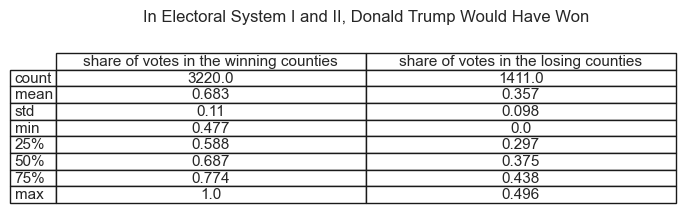

In [542]:
df_I_II_statistics = pd.DataFrame({
    "share of votes in the winning counties" : df_county_won['share of votes in the winning counties'].describe(),
    "share of votes in the losing counties" : df_county_lost['share of votes in the losing counties'].describe(),
})
df_I_II_statistics = df_I_II_statistics.round(decimals = 3)
fig=plt. figure (figsize = (8, 0.3))
ax = fig.add_subplot(111)
ax.table(cellText = df_I_II_statistics.values, colLabels = df_I_II_statistics.columns,
         rowLabels = df_I_II_statistics.index, cellLoc = 'center')
ax.set_title ("In Electoral System I and II, Donald Trump Would Have Won")
ax.axis ('off')
plt.show()

The above summary statistics table presented the basic information about Electoral System I and II. Let's revisit the definition of the two electoral systems. For electoral system I, each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes. For electoral system II, each county has one vote, it casts its vote on the party (candidate) that won the majority of votes. Both electoral systems share a same characteristic, that is the decision-making level is at the county. Therefore, systematically speaking, there exists a great potential for the counties with large population to overstep the ones with less population, which is not beneficial to the Republican policy. The gap between the two 50%-data is about 31%, keep this data in mind, and we will compare it with the next table.

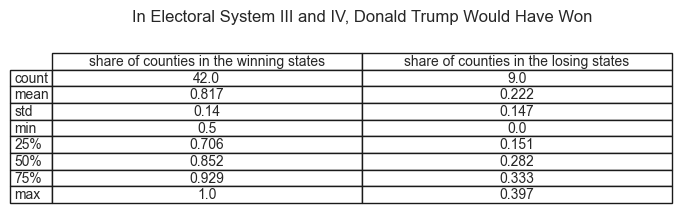

In [543]:
df_III_IV_statistics = pd.DataFrame({
    "share of counties in the winning states": df_state_won['share of counties in the winning states'].describe(),
    "share of counties in the losing states": df_state_lost['share of counties in the losing states'].describe(),
})
df_III_IV_statistics = df_III_IV_statistics.round(decimals = 3)
fig2 = plt.figure(figsize = (8, 0.3))
ax2 = fig2.add_subplot(111)
ax2.table(cellText = df_III_IV_statistics.values, colLabels = df_III_IV_statistics.columns,
         rowLabels = df_III_IV_statistics.index, cellLoc = 'center')
ax2.set_title("In Electoral System III and IV, Donald Trump Would Have Won")
ax2.axis ('off')
plt.show()

The above summary statistics table presented the basic information about Electoral System III and IV. Let's revisit the definition of the two electoral systems. For electoral system III, each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties. For electoral system IV, Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties. Both electoral systems here also share a same characteristic, that is the decision-making level is at the state. Therefore, systematically speaking, no matter how many votes the Democrat receives at the large counties, it only counts as 1 vote per county at the state level. As a result, the advantage of Trump being popular with smaller counties is now fully exploited. The gap between the two 50%-data is about 57%, which is almost a double of the 31% from the above, which proves the previous reasoning.

## Plots, Histograms, Figures
### County Level Analysis
#### Favor for Trump in Smaller Counties
It is a well-known statement that Trump is more popular in the rural places, to test this statement, the following is a plot with Trump's share of votes against the total amount of votes in every county.

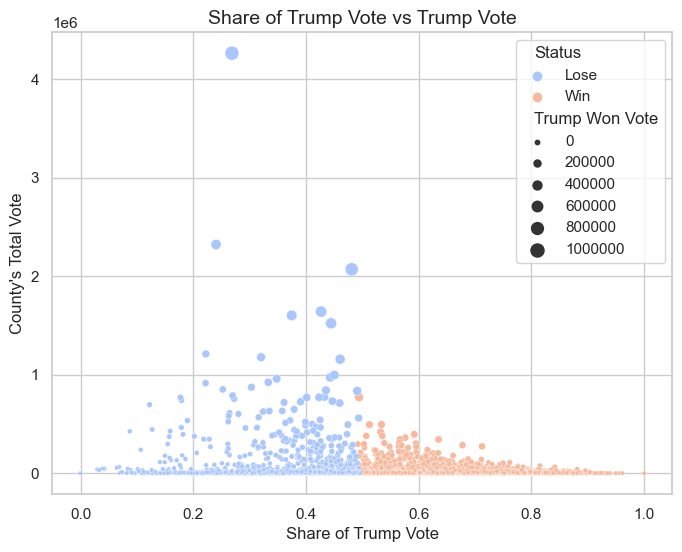

In [544]:
df_county_plot = df_county_won.copy()
df_county_plot.rename(columns={'share of votes in the winning counties': 'trump_vote_share'}, inplace = True)
df_county_plot1 = df_county_lost.copy()
df_county_plot1.rename(columns={'share of votes in the losing counties': 'trump_vote_share'}, inplace = True)
df_county_plot = pd.concat([df_county_plot, df_county_plot1])
plt.figure(figsize = (8,6))
sns.scatterplot(data = df_county_plot, x = "trump_vote_share", y = 'county_total_votes', hue = "won", size = "won_votes", palette = "coolwarm", sizes=(10,100))

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Lose")
    if i == 2:
        label.set_text("Win")
    if i == 3:
        label.set_text("Trump Won Vote")

plt.title("Share of Trump Vote vs Trump Vote", fontdict={'family': 'sans-serif', 'size': 14})
plt.xlabel("Share of Trump Vote", fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'normal'})
plt.ylabel("County's Total Vote", fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'normal'})
#plt.tick_params(axis="both", which="major", labelsize=12)
plt.show()

In the above scatterplot, we see two triangle shape of blue and red color dots standing back to back with each other. The red triangle is where Trump won the voting in the county, and the blue triangle is where Trump had lost the county election to another candidate, in this year we are mostly talking about Joe Biden. From the distribution of the dots, we see a denser cluster of dots on the bottom of the red side where Trump won in the county. And at the same time, the height of the blue triangle is much higher than the peak on the red. This indicates that Trump was more popular in the small counties, cities than he was in the large counties, cities, which accords with the popular statement that he is more favored in rural places where counties are small.

#### Participation Rate Versus Population
Since we have proved that Trump's support rate is strongly related with the size of the county, other variables related to population and voting are also worthwhile to included. Participation rate is another significant factor of how many votes can a county generate, it matters to not only the Republicans but to all parties in the United States. Here the participation rate means the percentage of people who voted (county_total_votes) in the total population within a county.

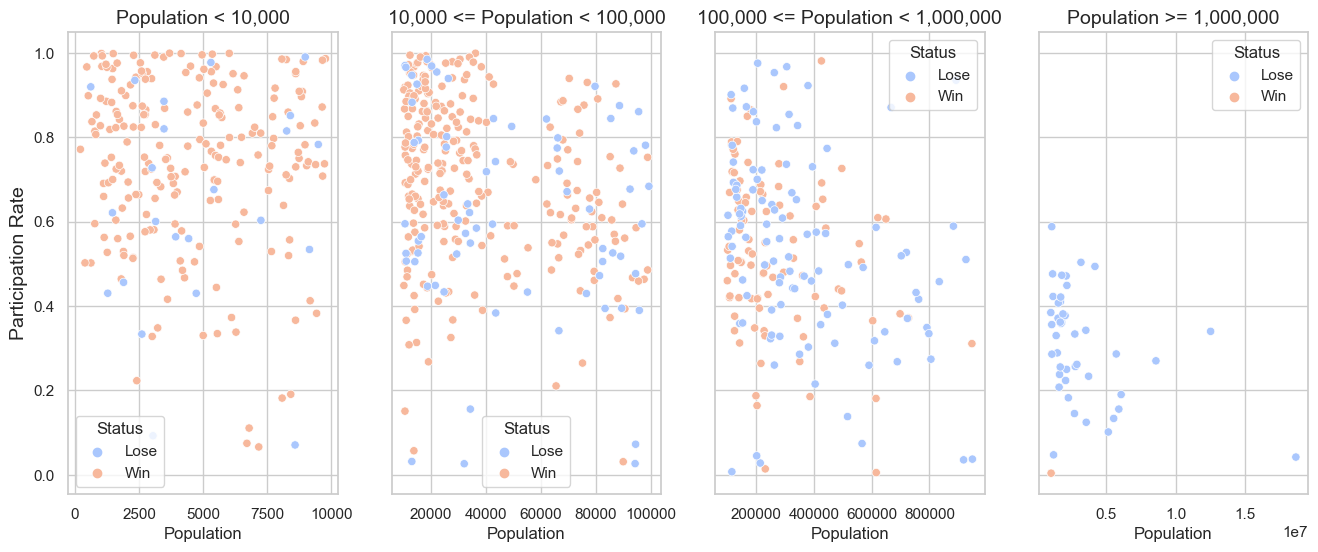

In [545]:
df_county_pop = pd.merge(df_county_plot, df_geo_pop, on = ['state', 'county'])
df_county_pop.drop(df_county_pop[df_county_pop['population'] < df_county_pop['county_total_votes']].index, inplace = True)
df_county_pop['participation_rate'] = df_county_pop['county_total_votes'] / df_county_pop['population']

df_county_pop1 = df_county_pop.copy()
df_county_pop1.drop(df_county_pop1[df_county_pop1['population'] >= 10000].index, inplace = True)
df_county_pop2 = df_county_pop.copy()
df_county_pop2.drop(df_county_pop2[df_county_pop2['population'] < 10000].index, inplace = True)
df_county_pop2.drop(df_county_pop2[df_county_pop2['population'] >= 100000].index, inplace = True)
df_county_pop3 = df_county_pop.copy()
df_county_pop3.drop(df_county_pop3[df_county_pop3['population'] < 100000].index, inplace = True)
df_county_pop3.drop(df_county_pop3[df_county_pop3['population'] >= 1000000].index, inplace = True)
df_county_pop4 = df_county_pop.copy()
df_county_pop4.drop(df_county_pop4[df_county_pop4['population'] < 1000000].index, inplace = True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6), sharey=True)
sns.scatterplot(data=df_county_pop1, x="population", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax1)
ax1.set_title("Population < 10,000", fontsize=14)
ax1.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop2, x="population", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax2)
ax2.set_title("10,000 <= Population < 100,000", fontsize=14)
ax2.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop3, x="population", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax3)
ax3.set_title("100,000 <= Population < 1,000,000", fontsize=14)
ax3.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop4, x="population", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax4)
ax4.set_title("Population >= 1,000,000", fontsize=14)
ax4.set_xlabel("Population", fontsize=12)

ax1.set_ylabel("Participation Rate", fontsize=14)

axes = [ax1, ax2, ax3, ax4]
for j in range(len(axes)):
    legend_labels = axes[j].get_legend().get_texts()
    for i, label in enumerate(legend_labels):
        if i == 0:
            label.set_text("Lose")
        if i == 1:
            label.set_text("Win")
    axes[j].get_legend().set_title("Status")

plt.show()

The above 4 scatterplots hold population against participation rate in a continuous manner. What we can see from the pattern is that, in general the higher the population, the lower the participation rate. In the first plot where population is under 10000, the pattern of decreasing participation rate is not very obvious. However, starting from the second plot, the distribution of the plots clearing went downward sloping. By differentiating counties where Trump won or lost, we see that there is no much divergence between distribution of the red dots and the blue dots. Participation rate behaves almost the same way in both conditions.

#### Participation Rate Versus Density
After we analyzed the relationship between participation rate and population, it is easy to think of how the other population variable, density, plays out with the participation rate.

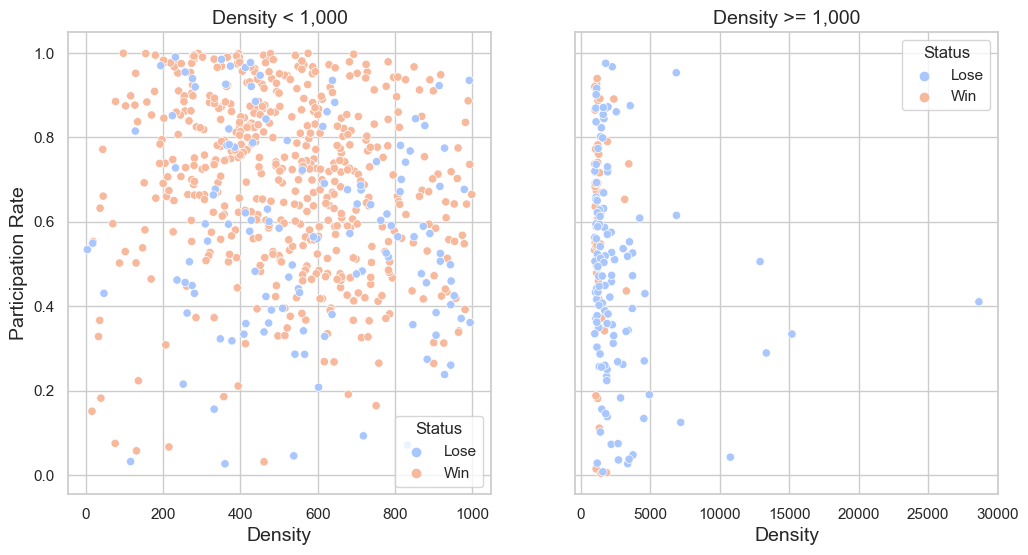

In [546]:
df_county_density1 = df_county_pop.copy()
df_county_density1.drop(df_county_density1[df_county_density1['density'] >= 1000].index, inplace = True)
df_county_density2 = df_county_pop.copy()
df_county_density2.drop(df_county_density2[df_county_density2['density'] < 1000].index, inplace = True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.scatterplot(data=df_county_density1, x="density", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax1)
sns.scatterplot(data=df_county_density2, x="density", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax2)
ax1.set_ylabel("Participation Rate", fontsize=14)
ax1.set_title("Density < 1,000", fontsize=14)
ax2.set_title("Density >= 1,000", fontsize=14)
ax1.set_xlabel("Density", fontsize=14)
ax2.set_xlabel("Density", fontsize=14)

axes = [ax1, ax2, ax3, ax4]
for j in range(len(axes)):
    legend_labels = axes[j].get_legend().get_texts()
    for i, label in enumerate(legend_labels):
        if i == 0:
            label.set_text("Lose")
        if i == 1:
            label.set_text("Win")
    axes[j].get_legend().set_title("Status")

plt.show()

Surprisingly, not much correlation between participation rate and density is exhibited in the above plots. Although the thought of Trump being not favored in the places where population density is high comes naturally from the previous section of scatterplot, it is noteable that Trump not being popular in the populated counties does not necessarily mean he is not popular in the dense counties. In other words, Trump could possibly has the same chance to win a small but dense county as Biden does.

#### Trump Vote Share Versus Latitude
Geographical elements is also another interesting aspect of the US politics. By putting the share of Trump votes against Latitude, the plot is reorganizing the US map by the East-West direction, the counties that Trump had won is on the left, the counties that Trump had lost is on the right side. North counties are still in the north, south counties are still in the south.

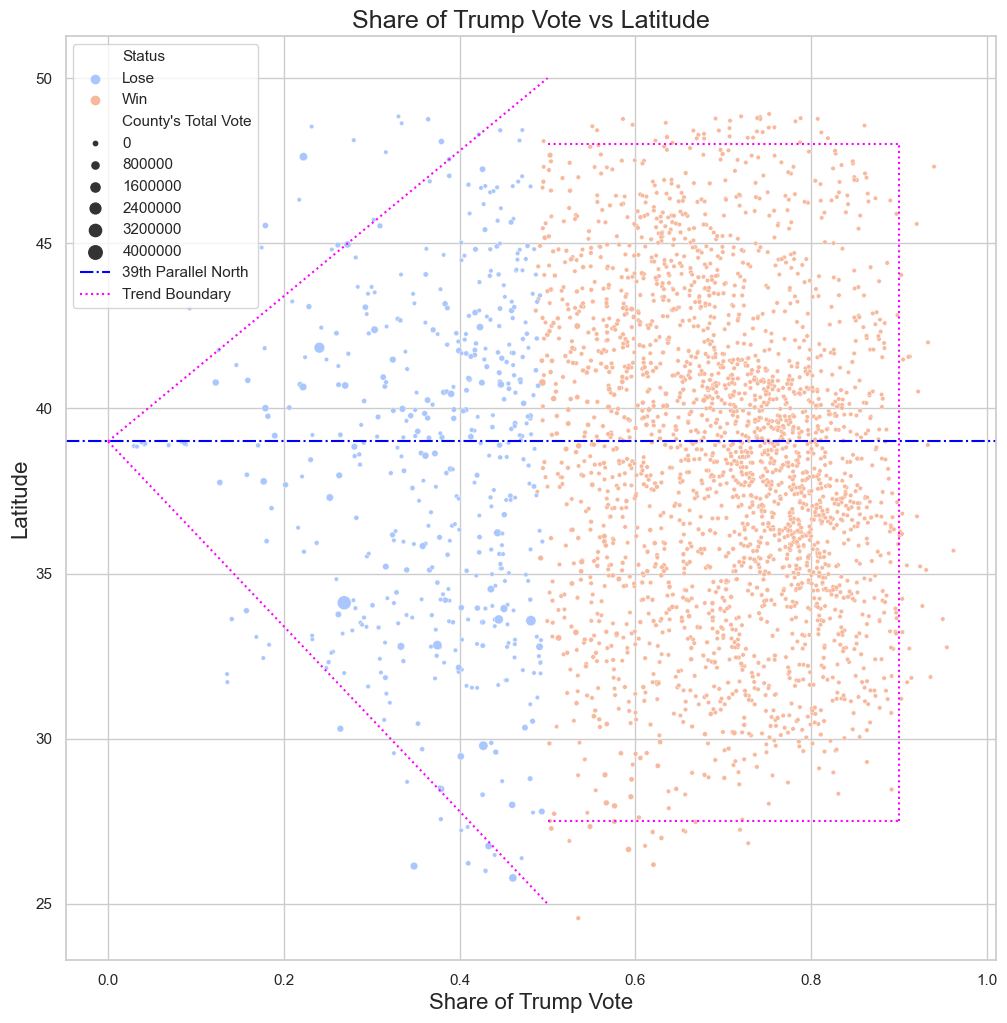

In [547]:
df_county_geo = df_county.copy()
df_county_geo.drop(['candidate', 'party', 'won', 'total_votes'], axis = 1, inplace = True)
df_county_geo = pd.merge(df_county_plot, df_county_geo, on = ['state', 'county'], how = 'left')
df_county_geo = df_county_geo[~df_county_geo["state"].isin(["Alaska", "Hawaii"])]
plt.figure(figsize=(12, 12))
sns.scatterplot(data=df_county_geo, x="trump_vote_share",
                y='lat', hue="won", size="county_total_votes",
                palette="coolwarm", sizes=(10, 100))

plt.axhline(y=39, color='blue', linestyle='dashdot', label='39th Parallel North')
plt.legend()

plt.title("Share of Trump Vote vs Latitude", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Share of Trump Vote", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.plot([0, 0.5], [39, 25], color="magenta", linestyle=':')
plt.plot([0, 0.5], [39, 50], color="magenta", linestyle=':')
plt.plot([0.9, 0.9], [27.5, 48], color="magenta", linestyle=':')
plt.plot([0.5, 0.9], [48, 48], color="magenta", linestyle=':')
plt.plot([0.5, 0.9], [27.5, 27.5], color="magenta", linestyle=':', label='Trend Boundary')
plt.legend()

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Lose")
    if i == 2:
        label.set_text("Win")
    if i == 3:
        label.set_text("County's Total Vote")

plt.show()

By looking at the shape we can see that on the red side where Trump had won, the dots are distributed evenly throughout on both sides of 39th parallel north. It indicates that, if Trump wins the county, the likelihood of it locating at any latitude is random, and the advantage that Trump has over his winning is also random.

Whereas on the blue side where Trump had lost, the shape of the distribution exhibits a distinctive convergence on the left side. This shows that for a county that Trump loses at a weak disadvantage, it is more likely to be located at the north or south, but not at the center.

In [548]:
df_county_geo[df_county_geo.trump_vote_share<0.1]

,state,county,candidate,party,won,won_votes,county_total_votes,trump_vote_share,lat,lng
3222,District of Columbia,Ward 1,Donald Trump,REP,False,1725,41681,0.041386,38.9072,-77.0369
3223,District of Columbia,Ward 2,Donald Trump,REP,False,2918,32881,0.088744,38.9063,-77.0340
3224,District of Columbia,Ward 3,Donald Trump,REP,False,3705,44231,0.083765,38.9884,-77.0900
3225,District of Columbia,Ward 4,Donald Trump,REP,False,1913,45296,0.042233,38.9310,-77.0380
3226,District of Columbia,Ward 5,Donald Trump,REP,False,1769,46107,0.038367,38.9717,-77.0089
3227,District of Columbia,Ward 6,Donald Trump,REP,False,4337,62918,0.068931,38.8869,-76.9896
3228,District of Columbia,Ward 7,Donald Trump,REP,False,1134,38384,0.029544,38.8582,-76.9478
3229,District of Columbia,Ward 8,Donald Trump,REP,False,1085,32858,0.033021,38.8409,-76.9859
3329,Maine,Hersey,Donald Trump,REP,False,0,42,0.000000,NaN,NaN
3477,Maryland,Prince George's,Donald Trump,REP,False,37090,424855,0.087300,38.9549,-76.7406


By listing out all counties where Trump's vote share is smaller than 10%, we can see that the District of Columbia and Massachusetts are outstanding outliers among all districts with their exceptionally low support rate for Trump.

#### Trump Vote Share Versus Longitude
After the analysis on latitude, it is also important to investigate the variable, longitude. For this graph, I put longitude on the x-axis, so it aligns with the actual map. The plot reorganized the US map by the North-South direction, the counties that Trump had won is on the top, the counties that Trump had lost is on the bottom. East counties are still in the east, west counties are still in the west.

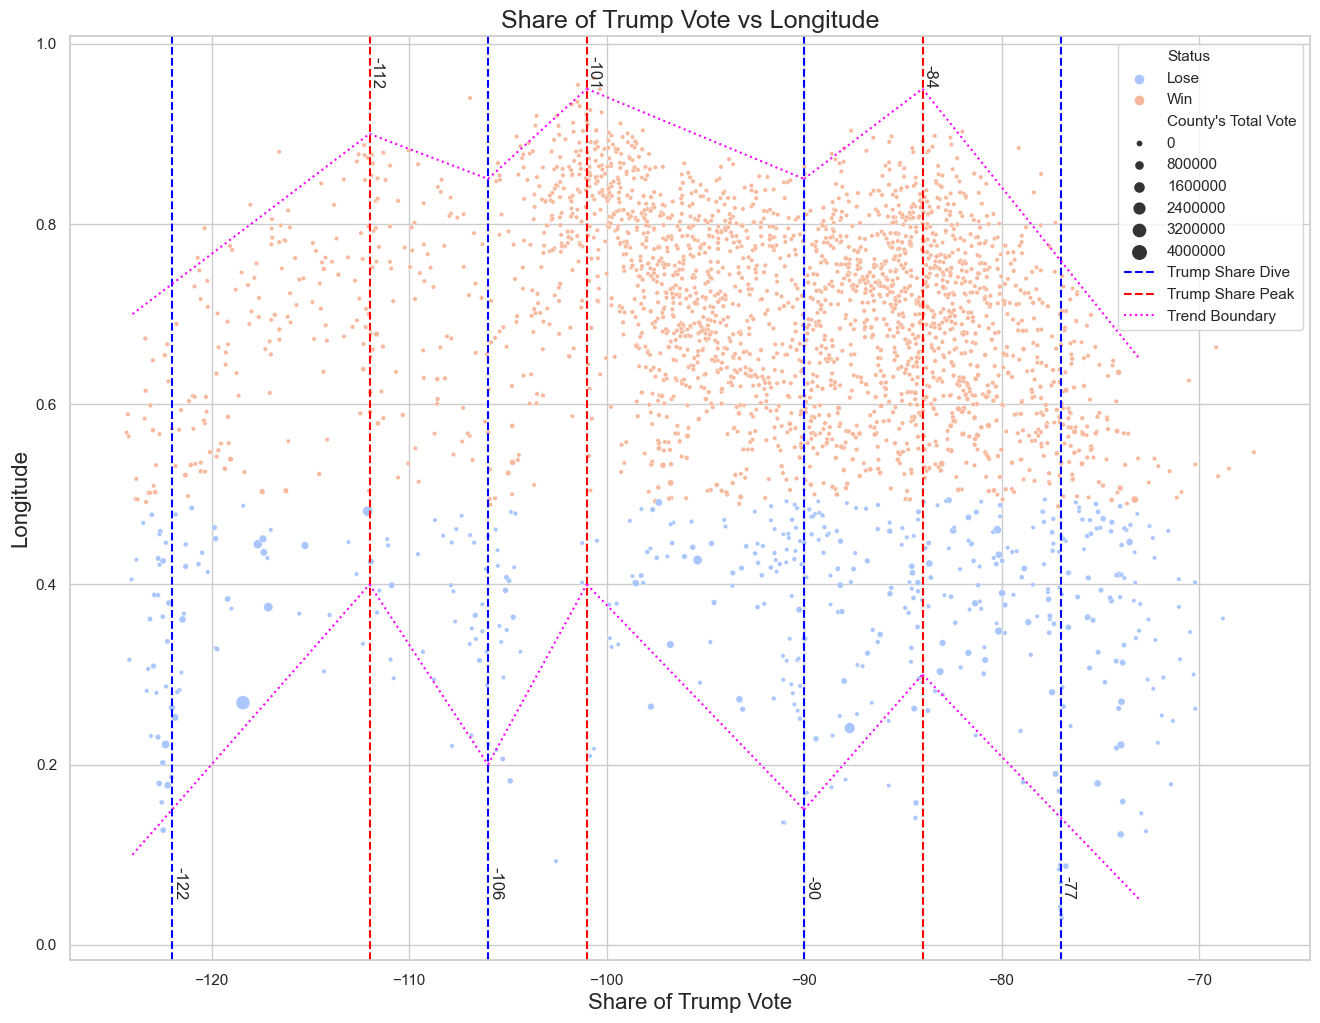

In [549]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_county_geo, x="lng",
                y='trump_vote_share', hue="won", size="county_total_votes",
                palette="coolwarm", sizes=(10, 100))
plt.axvline(x=-122, color='blue', linestyle='dashed', label='Trump Share Dive')
plt.legend()
plt.text(-122, 0.05, '-122', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-112, color='red', linestyle='dashed', label='Trump Share Peak')
plt.legend()
plt.text(-112, 0.95, '-112', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-106, color='blue', linestyle='dashed')
plt.text(-106, 0.05, '-106', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-101, color='red', linestyle='dashed')
plt.text(-101, 0.95, '-101', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-90, color='blue', linestyle='dashed')
plt.text(-90, 0.05, '-90', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-84, color='red', linestyle='dashed')
plt.text(-84, 0.95, '-84', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-77, color='blue', linestyle='dashed')
plt.text(-77, 0.05, '-77', rotation=-90, va='bottom', ha='left')

plt.plot([-124, -112], [0.1, 0.4], color="magenta", linestyle=':', label='Trend Boundary')
plt.legend()
plt.plot([-124, -112], [0.7, 0.9], color="magenta", linestyle=':')
plt.plot([-112, -106], [0.4, 0.2], color="magenta", linestyle=':')
plt.plot([-112, -106], [0.9, 0.85], color="magenta", linestyle=':')
plt.plot([-106, -101], [0.2, 0.4], color="magenta", linestyle=':')
plt.plot([-106, -101], [0.85, 0.95], color="magenta", linestyle=':')
plt.plot([-101, -90], [0.4, 0.15], color="magenta", linestyle=':')
plt.plot([-101, -90], [0.95, 0.85], color="magenta", linestyle=':')
plt.plot([-90, -84], [0.15, 0.3], color="magenta", linestyle=':')
plt.plot([-90, -84], [0.85, 0.95], color="magenta", linestyle=':')
plt.plot([-84, -73], [0.3, 0.05], color="magenta", linestyle=':')
plt.plot([-84, -73], [0.95, 0.65], color="magenta", linestyle=':')
plt.legend()

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Lose")
    if i == 2:
        label.set_text("Win")
    if i == 3:
        label.set_text("County's Total Vote")

plt.title("Share of Trump Vote vs Longitude", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Share of Trump Vote", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

plt.show()

As from the graph, we see a very interesting pattern of distribution. Starting from the farthest west (lng -125), the general votes are relatively unfavored of Donald Trump; then we move sightly to the east (lng -112), we see a local peak; we continue to move forward to east (lng -106), we see a local dive; etc. At the end, we actually have 4 dives in total, and 3 peaks in between them. This means that the Trump's vote share follows a wave-like movement on from west to east.

#### Geographical Distribution of Trump Share Votes
By combining the latitude and longitude graph together, we have the following map for Trump share of votes on the US mainland, where the blue lines represent areas with lower Trump share, and the red lines represent areas with higher Trump share.

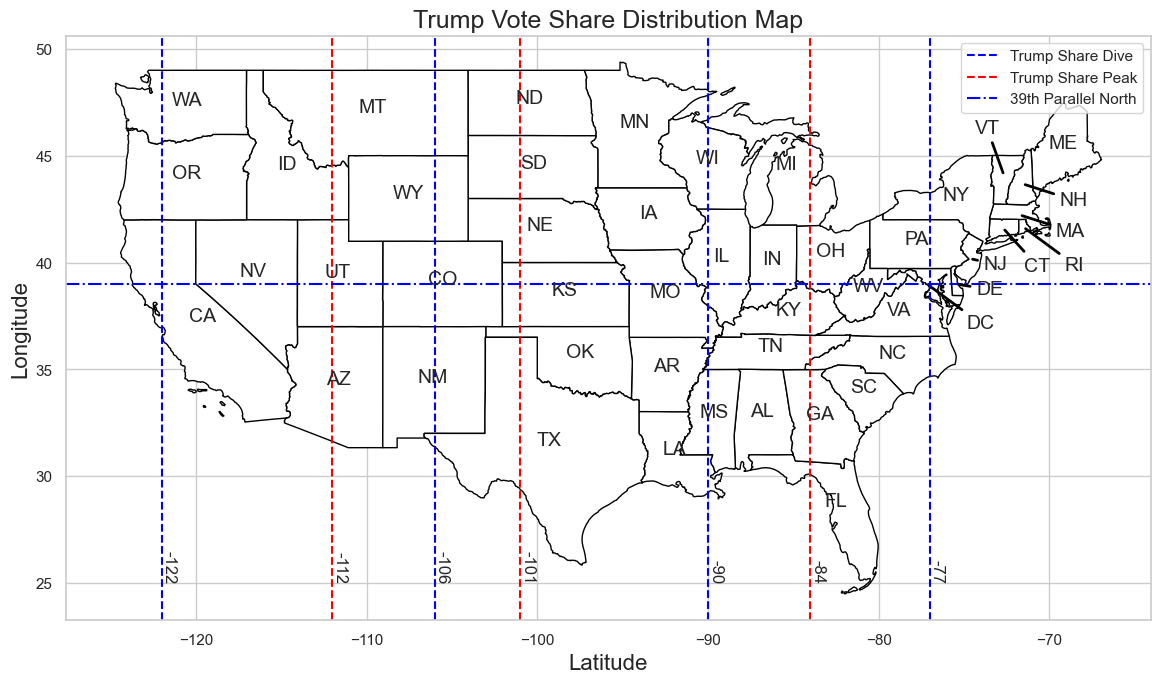

In [550]:
#generate geodataframe
usa = gpd.read_file('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/cb_2021_us_state_20m/cb_2021_us_state_20m.shp')
gpd_state = usa[~usa["NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"])]
gpd_state = gpd_state.copy()
gpd_state.sort_values(by=['NAME'], ascending=True, axis=0, inplace =True)
df_state1.rename(columns={"state": "NAME"}, inplace = True)
gpd_state = pd.merge(gpd_state, df_state1, on="NAME", how="left")
#plot
fig, gax = plt.subplots(1, figsize=(14, 8))
ax = fig.add_subplot()
gpd_state.plot(ax=ax, edgecolor="black", color="white")
plt.axvline(x=-122, color='blue', linestyle='dashed', label='Trump Share Dive')
plt.legend()
plt.text(-122, 25, '-122', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-112, color='red', linestyle='dashed', label='Trump Share Peak')
plt.legend()
plt.text(-112, 25, '-112', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-106, color='blue', linestyle='dashed')
plt.text(-106, 25, '-106', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-101, color='red', linestyle='dashed')
plt.text(-101, 25, '-101', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-90, color='blue', linestyle='dashed')
plt.text(-90, 25, '-90', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-84, color='red', linestyle='dashed')
plt.text(-84, 25, '-84', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-77, color='blue', linestyle='dashed')
plt.text(-77, 25, '-77', rotation=-90, va='bottom', ha='left')
plt.axhline(y=39, color='blue', linestyle='dashdot', label='39th Parallel North')
plt.legend()
for idx, row in gpd_state.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['VT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['NJ']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['RI']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['CT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DC']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
    else:
        ax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
gax.axis('off')
plt.title("Trump Vote Share Distribution Map", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.show()

# Project Two
## The Message
The more the electoral system is leaning towards the smaller county, the more likely Donald Trump is going to win the election.

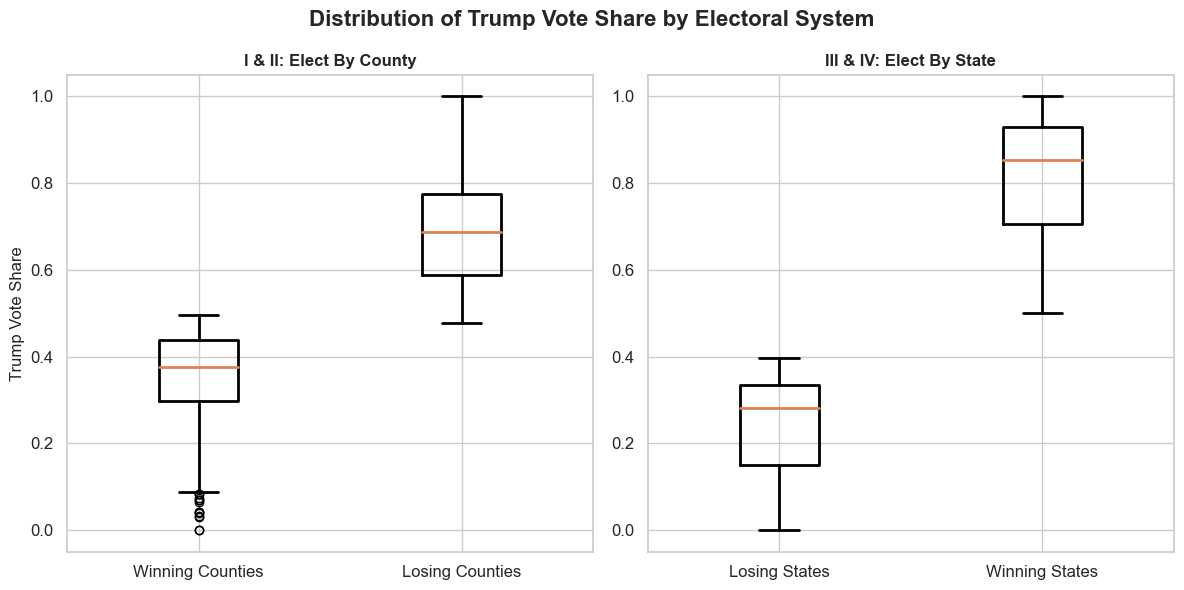

In [551]:
df_boxplot1 = pd.DataFrame({
    'share of votes in the winning counties': df_county_won['share of votes in the winning counties'],
})
df_boxplot1['Electoral Systems'] = 'share of votes in the winning counties'
df_boxplot1.rename(columns={'share of votes in the winning counties': 'Value'}, inplace=True)

df_boxplot2 = pd.DataFrame(data=df_county_lost, columns=['share of votes in the losing counties'])
df_boxplot2['Electoral Systems'] = 'share of votes in the losing counties'
df_boxplot2.rename(columns={'share of votes in the losing counties': 'Value'}, inplace=True)

df_boxplot1 = pd.concat([df_boxplot1, df_boxplot2])
df_boxplot1['Group'] = 'I & II: Elect By County'

df_boxplot3 = pd.DataFrame(data=df_state_won, columns=['share of counties in the winning states'])
df_boxplot3['Electoral Systems'] = 'share of counties in the winning states'
df_boxplot3.rename(columns={'share of counties in the winning states': 'Value'}, inplace=True)

df_boxplot4 = pd.DataFrame(data=df_state_lost, columns=['share of counties in the losing states'])
df_boxplot4['Electoral Systems'] = 'share of counties in the losing states'
df_boxplot4.rename(columns={'share of counties in the losing states': 'Value'}, inplace=True)

df_boxplot3 = pd.concat([df_boxplot3, df_boxplot4])
df_boxplot3['Group'] = 'III & IV: Elect By State'

df_boxplot = pd.concat([df_boxplot1, df_boxplot3])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2)
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

for i, (name, group) in enumerate(df_boxplot.groupby('Group')):
    ax = axes[i]
    group.boxplot(by='Electoral Systems', ax=ax, positions=[1, 2], widths=0.3,
                  boxprops=boxprops, medianprops=medianprops,
                  whiskerprops=whiskerprops, capprops=capprops)

    ax.set_xlabel('')

    if i == 0:
        ax.set_xticklabels(['Winning Counties', 'Losing Counties'])
        ax.set_ylabel('Trump Vote Share')
    else:
        ax.set_xticklabels(['Losing States', 'Winning States'])

    ax.set_title(name, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.suptitle('Distribution of Trump Vote Share by Electoral System', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


Let us recall the rule of the 2 general types of electoral system defined at the beginning of this paper:

*Elect By County*: A county casts all of its votes on the party (candidate) that won the majority of votes.

*Elect By State*: A state casts all of its votes on the party (candidate) that won the majority of counties.

According to the rules, in the first general type, if a county is large enough, it has the potential of overstepping multiple small counties using its large volume of votes; whereas in the second general type, since the decision-making level is at the state, and the majority of the counties in a state are small counties, Donald Trump's victory would have been dominant.

The above two groups of boxplot showed the gap between losing and winning districts is very different between groups. In the first group, which stands for *Elect By County*, the gap between 2 50% green lines is about 0.3. However, in the second group, which stands for *Elect By State*, the gap between 2 50% green lines is almost about 0.6, doubling the gap in the first group. The larger the gap, the more overwhelming the victory.

## Maps and Interpretations
For both dataframes, remove Hawaii and Alaska out of the dataframe, to make the mainland graph more clear.

In [552]:
df_county_mainland = df_county[~df_county["state"].isin(["Alaska", "Hawaii"])]
df_state_mainland = df_state2[~df_state2["state"].isin(["Alaska", "Hawaii"])]

### Electoral System I

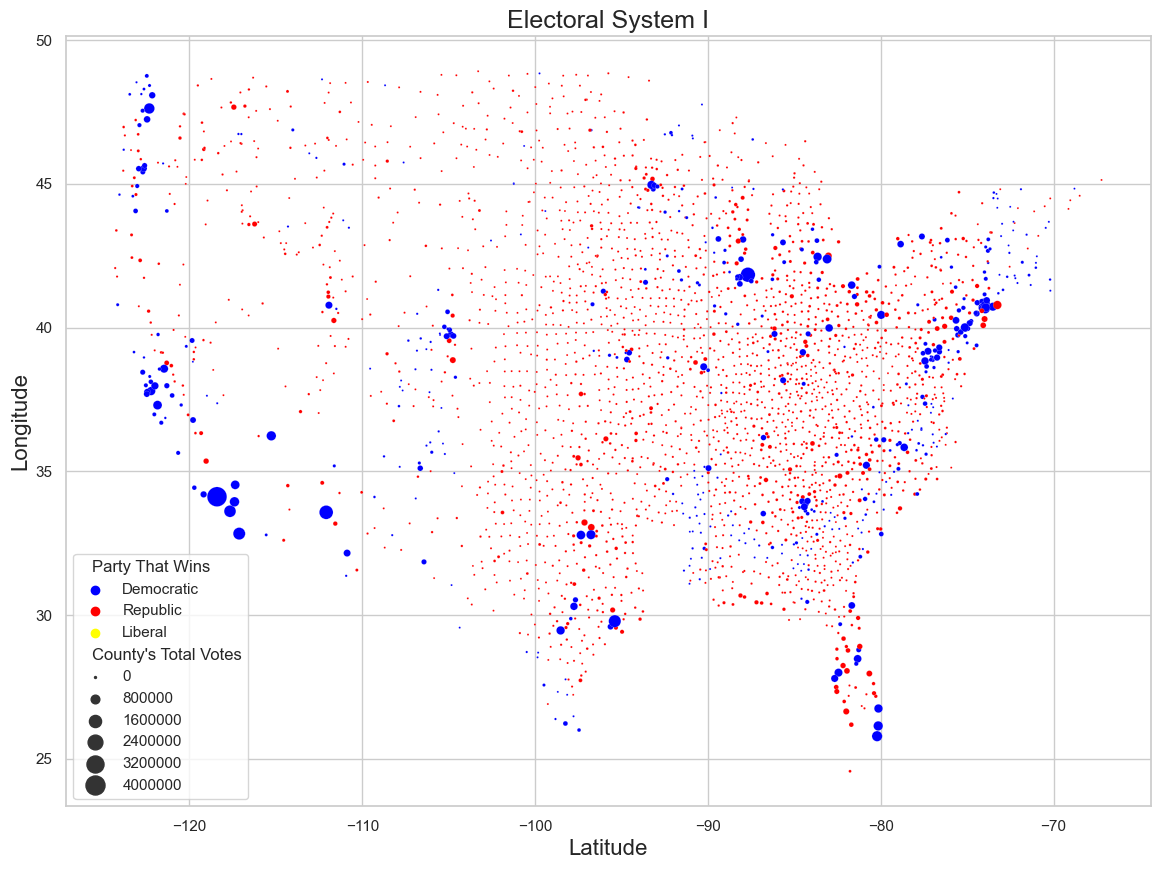

In [553]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue', 'red', 'yellow'])
plt.title("Electoral System I", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Party That Wins")
    if i == 1:
        label.set_text("Democratic")
    if i == 2:
        label.set_text("Republic")
    if i == 3:
        label.set_text("Liberal")
    if i == 4:
        label.set_text("County's Total Votes")
plt.show()

In [554]:
y1 = df_county.groupby('party')['total_votes'].sum()['DEM']
y2 = df_county.groupby('party')['total_votes'].sum()['REP']
y3 = df_county.groupby('party')['total_votes'].sum()['LIB']
y4 = df_county.groupby('party')['total_votes'].sum()['WRI']
result_1 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_1 = pd.DataFrame(result_1, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_1

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,94602377,True
1,REP,Donald Trump,64940909,False
2,LIB,Jo Jorgensen,42,False
3,WRI,Write-ins,64909,False


Under this system, each county has the same number of votes as its number of voters and casts all of its votes on the party (candidate) that won the majority of votes. In this scenario, Joe Biden emerged as the winner. This can be attributed to the fact that Biden was able to secure the majority of votes in a number of megacities, thereby gaining a significant number of electoral votes. Although Trump won large number of counties, the population still doesn't add up to the level of the population from megacities, therefore he lost.

### Electoral System II

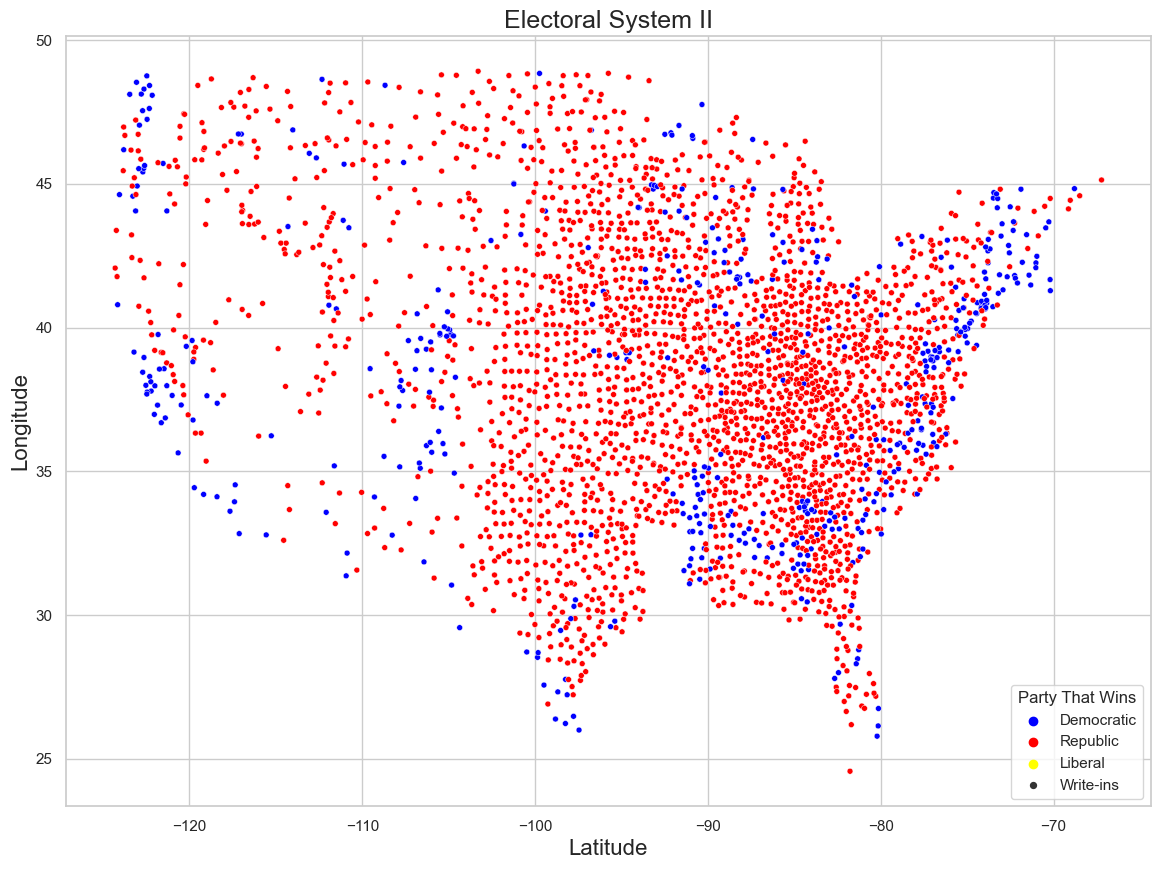

In [555]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = 20, palette = ['blue', 'red', 'yellow'])
plt.title("Electoral System II", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.legend(title='Party That Wins', loc='lower right')
legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Democratic")
    if i == 1:
        label.set_text("Republic")
    if i == 2:
        label.set_text("Liberal")
    if i == 3:
        label.set_text("Write-ins")
plt.show()

In [556]:
y1 = df_county['party'].value_counts()['DEM']
y2 = df_county['party'].value_counts()['REP']
y3 = df_county['party'].value_counts()['LIB']
y4 = df_county['party'].value_counts()['WRI']
result_2 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_2 = pd.DataFrame(result_2, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_2

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,1409,False
1,REP,Donald Trump,3220,True
2,LIB,Jo Jorgensen,1,False
3,WRI,Write-ins,3,False


Under this system, each county has only one vote and casts its vote on the party (candidate) that won the majority of votes, therefore all the dots are of the same size. Donald Trump emerged as the winner under this system. Since all counties are weighted equally, the fact that Trump is popular with small counties and in several smaller counties, enabled him to secure a majority. Trump's performance in states that traditionally vote Republican has also contributed to his win.

### Electoral System III

In [557]:
df_state3 = df_state2.copy()
df_state3.drop_duplicates(subset = ['state'], keep = 'first', inplace = True)
df_state3.drop(['county', 'total_votes', 'won', 'lat', 'lng', 'candidate', '# of counties won'], axis = 1, inplace = True)
df_state3 = df_state3[~df_state3["state"].isin(["Alaska", "Hawaii"])]
df_ps_copy = df_ps.copy()
df_state_vote = pd.merge(df_state3, df_ps_copy, on='state', how='left')
df_state_vote.rename(columns={"state": "NAME"}, inplace = True)
gpd_state = pd.merge(gpd_state, df_state_vote, on=['NAME', 'party'], how='left')

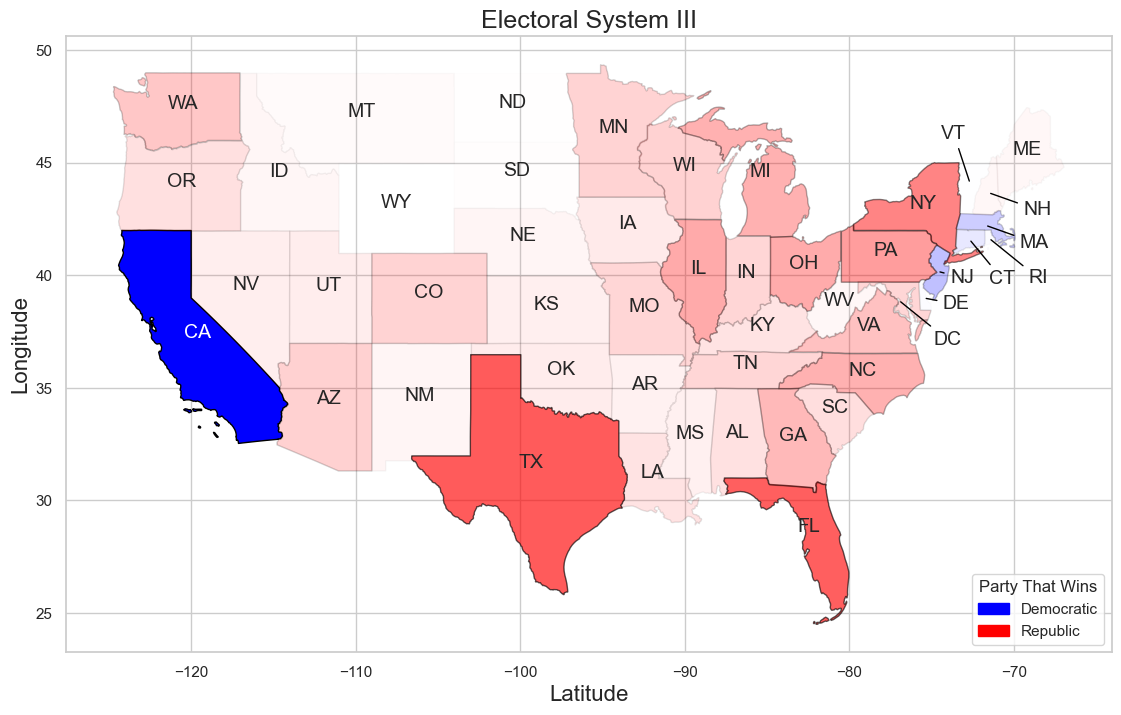

In [558]:
fig, gax= plt.subplots(figsize=(14, 8))

# Define color mapping
colors = {'DEM': 'blue', 'REP': 'red'}

# Define minimum and maximum values for color scale
vmin = gpd_state['total_votes'].min()
vmax = gpd_state['total_votes'].max()

# Plot each state with the appropriate color and shade
for index, row in gpd_state.iterrows():
    color = colors.get(row['party'], 'gray')
    total_votes = row['total_votes']
    shade = (total_votes - vmin) / (vmax - vmin)
    gpd_state[gpd_state.index == index].plot(ax=gax, color=color, edgecolor='black', linewidth=1, alpha=shade)

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = colors.keys()
gax.legend(handles, labels, loc='lower right')

for idx, row in gpd_state.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC', 'CA']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['VT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['NJ']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['RI', 'DC']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['CT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['DE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['CA']:
            gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14, color = 'white')
    else:
        gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)

# Set plot title
plt.title("Electoral System III", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = ['Democratic', 'Republic']
legend = gax.legend(handles, labels, loc='lower right')

# Set legend title
legend.set_title("Party That Wins")

# Show plot
plt.show()


In [559]:
y1 = df_state2.groupby('party')['total_votes'].sum()['DEM']
y2 = df_state2.groupby('party')['total_votes'].sum()['REP']
try:
    y3 = df_state2.groupby('party')['total_votes'].sum()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state2.groupby('party')['total_votes'].sum()['WRI']
except KeyError:
    y4 = 0
result_3 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_3 = pd.DataFrame(result_3, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_3

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,29822468,False
1,REP,Donald Trump,129785769,True
2,LIB,Jo Jorgensen,0,False
3,WRI,Write-ins,0,False


Under this system, each state has the same number of votes as its number of voters and casts all of its votes on the party (candidate) that won the majority of counties. Donald Trump emerged as the winner under this system. Since the number of counties where Trump is popular surpasses the number of cities where Biden is popular in almost every state, except for certain states that are Democrat's conservative base. In the general case, the higher number of rural counties in most states where Trump performed well played a crucial role in his win.

### Electoral System IV

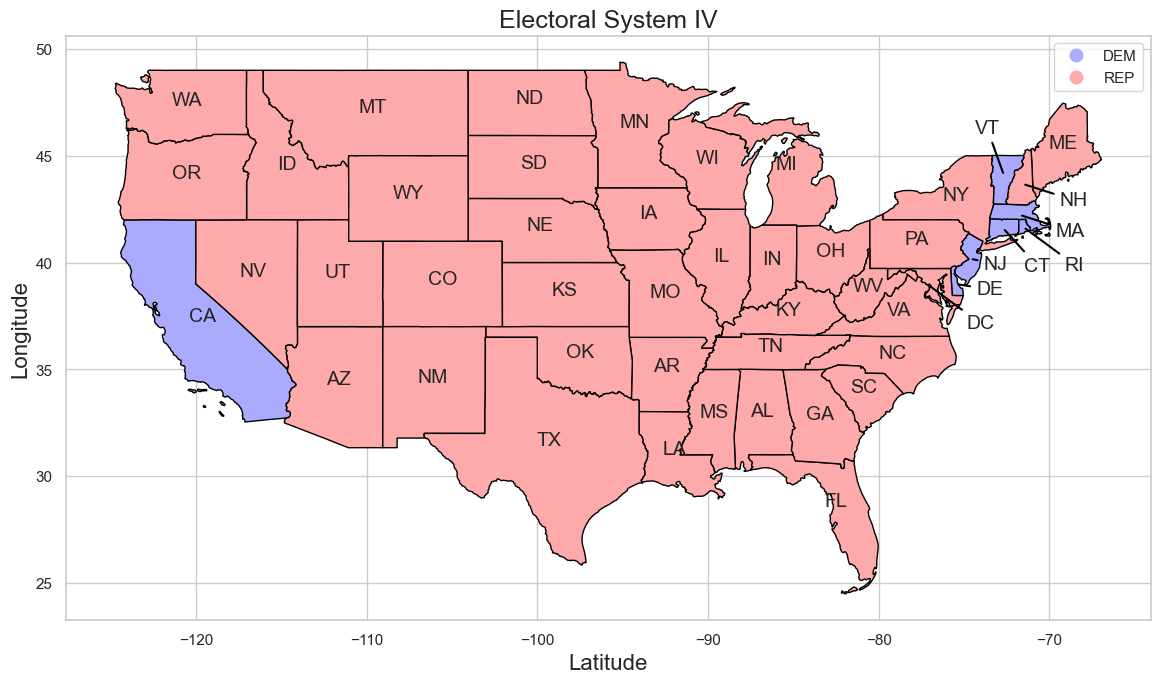

In [560]:
fig, gax= plt.subplots(1, figsize = (14,8))
gpd_state.plot(ax=gax, edgecolor='black', column='party', legend=True, cmap='bwr', categorical=True, vmin=-1, vmax=2)
for idx, row in gpd_state.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['VT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['NJ']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['RI']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['CT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['DE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['DC']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
    else:
        gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
plt.title("Electoral System IV", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.show()### Explore the schema: Manipulating it into a tabular structure


In [561]:
y1 = df_state1['party'].value_counts()['DEM']
y2 = df_state1['party'].value_counts()['REP']
try:
    y3 = df_state1['party'].value_counts()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state1['party'].value_counts()['WRI']
except KeyError:
    y4 = 0
result_4 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_4 = pd.DataFrame(result_4, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_4

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,9,False
1,REP,Donald Trump,42,True
2,LIB,Jo Jorgensen,0,False
3,WRI,Write-ins,0,False


### Summary of Four Electoral Systems

In [562]:
result = df_result_1.copy()
result.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result.rename(columns={"Fabricated Votes": "I"}, inplace = True)
result = result.T
new_header = result.iloc[0]
result = result[1:]
result.columns = new_header

result_add = df_result_2.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "II"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result_add = df_result_3.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "III"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result_add = df_result_4.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "IV"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result

Party,DEM,REP,LIB,WRI
I,94602377,64940909,42,64909
II,1409,3220,1,3
III,29822468,129785769,0,0
IV,9,42,0,0


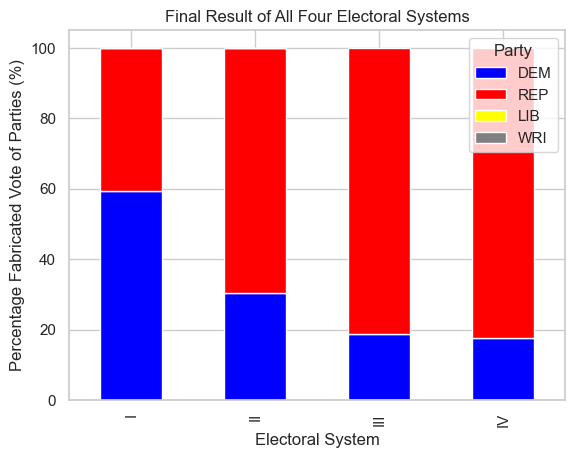

In [563]:
stacked_data = result.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, color = ['blue', 'red', 'yellow', 'grey'])
plt.title("Final Result of All Four Electoral Systems")
plt.xlabel("Electoral System")
plt.ylabel("Percentage Fabricated Vote of Parties (%)")
plt.show()

As from the above bar graph, the advantage Trump obtained in each of the electoral system is gradually increasing from the first one to the last one. This is because the weight small counties carry is increasing from left to right. It goes back to the message that Trump is favored by the people living in smaller counties, and if such group is given more weight, the likelihood of Trump winning the election will also increase.

# Project Three
## Potential Data to Scrape
One potential addition to the campaign spending data by candidate and state in the 2020 US presidential election dataset could be web scraping data on funding sources by sector. By scraping data on the fundraising, we could gain insights into which sector were spending money to support or oppose the candidates, and by how much.

One potential website to scrape this data from is OpenSecrets.org, which is a website that tracks money in politics. OpenSecrets.org provides data on funding source by candidate and by sector, which could help shed light on which groups were most active in trying to influence the election on a county-level.

To have an understanding of how this data could be parallel on our previous findings, we can take a look at whether the funding from the argricultural sector confirmed that Trump's policy is more appealing to people and businesses in the rural places, so that he attracts more funding than Biden; and whether Biden's policy is more attractive to urban cities so that finance sector is more willing to support him rather than Trump.

The above are just examples on how we could then use this new information to help answer my research question, the discussion later in this chapter will analyze the data in detail.

## Potential Challenges
Firstly, the website does not provide all the data that we need in a single location or in a format that is easy to scrape. We need to scrape data from multiple pages or even multiple websites to gather all the relevant information.

Secondly, merging the scraped data with our existing dataset may require more information on a state-level, which the website does not provide complete information on. In future work, we can find such information either by searching in other websites, or we can contact the website holder OpenSecrets for a more detailed dataset.

Side Note: I have also found a dataset that contains contribution details including industry, organization name, amount and states on https://www.fec.gov/data/candidates/president/presidential-map/. However, the size of the file was too large to be handled, therefore I choose to not use this in Project 3.

Here is the file:

In [564]:
#df_candidate_funding = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/P00000001-ALL.csv')
#df_candidate_funding.head(10)

## Scraping Data from a Website
Since the website I am working on does not have all the information on one page, therefore I have to run a for loop to scrape all the related HTML pages.

Create essential lists that will be used in scrapping. Since the funds can come from two channels, one is campaign committee, the other one is outside groups, we will also set a third channel which combines the previous two.

In [565]:
sectors = ['Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources', 'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business', 'Labor', 'Ideology/Single-Issue', 'Other']

# Total funding from campaign committee and outside groups by sector
channel_combined = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W']

# Funding from campaign committee by sector
channel_campaign_committee = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W&src=c']

# Funding from outside groups by sector
channel_outside_groups = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A&src=o',
                          'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W&src=o']

channel_fund = [channel_combined, channel_campaign_committee, channel_outside_groups]

For explanation purposes, I will use the first website link:'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A' to demonstrate detailed steps.


The requests library can be used to work with webpages and web content. A request is made to get the content of the webpage with the get() method.

In [566]:
import requests
from bs4 import BeautifulSoup

web_url = "https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A"
response = requests.get(web_url)

A response is received from the web server. This response will have response headers and status codes associated to that particular request. Response headers give the detailed information about the request made to the web server.

In [567]:
response.headers

{'Date': 'Fri, 24 Mar 2023 22:50:11 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Cache-Control': 'max-age=3600, public', 'CF-Connecting-IP': '138.51.89.155', 'Set-Cookie': '_opensecrets_session=8vXhAIo9XwTPJsg%2Bv7U1dCE0y3nXazpJ8x4n2GDp0%2BxjYSj21o5X6BwwB6n3RT7BR1Nlriec7ycEUQ7LFgsHHCTq80VuAk314xJ0EOGPPFBydeqftS2hWoB1X0CFe8s1M5A7FU5UJB4dfem4EqcTZSfyYjyJUVaUW79TOTdudv9BpVHGCrfFPb8OnnOiqQ1FahQLqg884jMt2zn0DLQP4HpPaK6jbNxb7lx38lOjEHWn3aOf92b0E6%2BlfQfOdz7Z47Yf%2FRIUFioKV%2BABzatZkdtBC7W8EmYRqaMivg%3D%3D--9VLqDKH7Zq1qHi5C--Q3WRWk1Yaif0PL%2BRYGvqyQ%3D%3D; path=/; HttpOnly', 'Status': '200 OK', 'Strict-Transport-Security': 'max-age=30758400', 'Vary': 'Origin', 'X-Cache-Server': 'ip-10-33-5-93', 'X-Cache-Status': 'HIT', 'X-Content-Type-Options': 'nosniff', 'X-Download-Options': 'noopen', 'X-Frame-Options': 'DENY', 'X-Permitted-Cross-Domain-Policies': 'none', 'X-Powered-By': 'Phusion Passenger(R) 6.0.8', 'X-RAILS-IP': '172.17.0.2

Every response will have a status code. The status codes indicate whether a specific HTTP request has been successfully completed. Responses are grouped in five classes:

Informational responses (100–199)
Successful responses (200–299)
Redirects (300–399)
Client errors (400–499)
Server errors (500–599)
Sometimes you get a client error like (403), then you should add your user agent as header to your Get request (google how to get user agent), you can also look at this stackoverflow page: https://stackoverflow.com/questions/38489386/python-requests-403-forbidden

Let us check the response status code for the HTTP request we placed

In [568]:
response.status_code

200

The response has a status code of 200. This is a successful response and hence there should be relevant content of the webpage in the obtained response. This can be checked by printing the content. This content received is the HTML source code of the webpage.

### Parsing HTML and accessing different elements
bs4 is a Python library which parses through HTML content and understands the complete structure of the content. The response content can be passed to a BeautifulSoup() method to obtain a soup object which looks very structured.

In [569]:
soup_object = BeautifulSoup(response.content, 'html.parser')

soup_object

<!DOCTYPE html>

<!--[if lte IE 8]><html class="no-js lte-ie9 lte-ie8" lang="en" dir="ltr"><![endif]-->
<!--[if IE 9]><html class="no-js lte-ie9" lang="en" dir="ltr"><![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" dir="ltr" lang="en">
<!--<![endif]-->
<head>
<!-- Google Tag Manager -->
<script>
    (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
      new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
      j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
      'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
      })(window,document,'script','dataLayer','GTM-MKPRXNV');
  </script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<script type="text/javascript">window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRJS-b7f93d6e9afef1935a5","applicationID":"1109265918","transactionName":"dFpeQkdcWQoGRE1DV1tcRF9WWlQIEGkHX11UQVlZW0A

### Explore the schema: Manipulating it into a tabular structure
---
To be able to accurately extract relevant data from the webpage, it is important to explore the schema and understand the structure of the webpage. A good way to do this is to inspect the webpage directly on a web browser.
<br>

To do this,
- Open the webpage on a browser
- Right click on the data content to be extracted
- Click on `Inspect` or `Inspect element` option

This will open a console window which shows the real time HTML code corresponding to the web content. Now identify the type of HTML tag which contains all the data along with any id names or class names associated to that HTML tag. In our case, the data is enclosed in the `<table>` HTML tag with the class name `'data-table'`. This information can be used to search for the web content directly in our soup object with the `find_all()` method. This will return a soup object.

It is important to look for <table class="??????">, where the "??????" will be used down below. In our case, the "??????" would be "DataTable":

...
<table class="DataTable" data-order='[[ 1, "desc" ]]'>
<thead>
<tr>
<th>Candidate</th>
<th class="number">Total</th>
</tr>
</thead>
<tbody>
<tr>
<td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>
<td class="number">$16,091,308</td>
</tr>
<tr>
...

In [570]:
data_table = soup_object.find_all('table', 'DataTable')[0]

data_table

<table class="DataTable" data-order='[[ 1, "desc" ]]'>
<thead>
<tr>
<th>Candidate</th>
<th class="number">Total</th>
</tr>
</thead>
<tbody>
<tr>
<td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>
<td class="number">$16,091,308</td>
</tr>
<tr>
<td><a href="/2020-presidential-race/joe-biden/candidate?id=N00001669">Biden, Joe (D)</a></td>
<td class="number">$6,928,442</td>
</tr>
<tr>
<td><a href="/2020-presidential-race/bernie-sanders/candidate?id=N00000528">Sanders, Bernie (D)</a></td>
<td class="number">$2,592,617</td>
</tr>
<tr>
<td><a href="/2020-presidential-race/pete-buttigieg/candidate?id=N00044183">Buttigieg, Pete (D)</a></td>
<td class="number">$788,650</td>
</tr>
<tr>
<td><a href="/2020-presidential-race/elizabeth-warren/candidate?id=N00033492">Warren, Elizabeth (D)</a></td>
<td class="number">$728,008</td>
</tr>
<tr>
<td><a href="/2020-presidential-race/amy-klobuchar/candidate?id=N00027500">Klobuchar, Amy (D)</a></td>
<td class=

It can be seen that relevant block of data has been extracted but further extraction needs to be done to individually extract the rank, company name and the company website data. On further analysis, it can be seen that every row of data is enclosed under a `<tr>` HTML tag which means `table row`. All these row values can be extracted into a list of values by finding the `<tr>` values from our newly created soup object `data_table`.

`<th>` means header row.
`<td>` defines a standard data cell in an HTML table.
`<a>`  defines a hyperlink.
If you happen to see a tag that you don't know what it means (which is most of the time!), you can google the name of the tage + HTML; for example, google this `<th> HTML`

Take a closer look at the data that we are interested in:

In [571]:
all_values = data_table.find_all('tr')
all_values[:3] # Prints the first 3 captured tag elements

[<tr>
 <th>Candidate</th>
 <th class="number">Total</th>
 </tr>,
 <tr>
 <td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>
 <td class="number">$16,091,308</td>
 </tr>,
 <tr>
 <td><a href="/2020-presidential-race/joe-biden/candidate?id=N00001669">Biden, Joe (D)</a></td>
 <td class="number">$6,928,442</td>
 </tr>]

In [572]:
print(all_values[0])
print('--')
print(all_values[1])
print('--')
print(all_values[2])

<tr>
<th>Candidate</th>
<th class="number">Total</th>
</tr>
--
<tr>
<td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>
<td class="number">$16,091,308</td>
</tr>
--
<tr>
<td><a href="/2020-presidential-race/joe-biden/candidate?id=N00001669">Biden, Joe (D)</a></td>
<td class="number">$6,928,442</td>
</tr>


### Organize the value we find
The first element of the list contains the column names 'Candidate' and 'Total'. The next elements of the list contain soup objects which contain the funding data. This data can be extracted in a loop since the structure for all the list elements is the same.

- An empty dataframe `df_fund` is created with the column names 'Candidate' and 'Total'
- The index is initiated to zero
- A for loop is designed to go through all the elements of the list in order and extract the candidate name and total funding amount from the list element which are enclosed in the `<td>` HTML tag. A `find_all()` will return a list of td tags.
- The `.text` attribute can be used to just pick the text part from the tag. In our case this is the rank, company name and the company website
- These values are then put into the dataframe and the index value is incremented

In [573]:
all_values[1].find_all('td')

[<td><a href="/2020-presidential-race/donald-trump/candidate?id=N00023864">Trump, Donald (R)</a></td>,
 <td class="number">$16,091,308</td>]

In [574]:
all_values[1].find_all('td')[0].text

'Trump, Donald (R)'

In [575]:
all_values[1].find_all('td')[1].text

'$16,091,308'

In [576]:
df_fund = pd.DataFrame(columns = ['Candidate', 'Total'])
ix = 0 # Initializing the row index for the DataFrame

# Scraping data from each row in the table and storing it in the DataFrame
for row in all_values[1:]:
    values = row.find_all('td')
    candidate = values[0].text
    total = values[1].text
    df_fund.loc[ix] = [candidate, total]# Store it in the dataframe as a row
    ix += 1

# Print the first 5 rows of the dataframe
df_fund.head()

,Candidate,Total
0,"Trump, Donald (R)","$16,091,308"
1,"Biden, Joe (D)","$6,928,442"
2,"Sanders, Bernie (D)","$2,592,617"
3,"Buttigieg, Pete (D)","$788,650"
4,"Warren, Elizabeth (D)","$728,008"


Now the scrapping demonstration for one website is completed. Let's use a for loop to iterate through all the websites.

In [577]:
# Part 1: Initializing the Data Structures
df_funds = list() #Creating an empty list to store all sector funds data.

# Part 2: Scraping Data for each channel (Combined, Campaign Committee, Outside Groups)
for fund in channel_fund:
    df_total_lists = [] # Creating an empty list to store each channel's data for all sectors
    for i in range(len(sectors)):
        totals = fund[i] # Generating the url to scrape data from
        response = requests.get(totals) # Requesting the web page for the url
        soup_object = BeautifulSoup(response.content, 'html.parser') # Parsing the html content using BeautifulSoup
        data_table = soup_object.find_all('table', 'DataTable')[0] # Finding the table containing the data we want to scrape
        all_values = data_table.find_all('tr') # Finding all rows in the table
        df_fund = pd.DataFrame(columns = ['Candidate', sectors[i]]) # Creating a DataFrame to store the scraped data for a single sector

        ix = 0 # Initializing the row index for the DataFrame
        # Scraping data from each row in the table and storing it in the DataFrame
        for row in all_values[1:]:
            values = row.find_all('td')
            candidate = values[0].text
            total = values[1].text
            df_fund.loc[ix] = [candidate, total]
            ix += 1

        df_total_lists.append(df_fund) # Storing the DataFrame for a single sector in the list of DataFrames for all sectors

    # Part 3: Merging Channel Data for fund
    # Performing a left join on the 'Candidate' column of all sector DataFrames
    df_channel_combined = df_total_lists[0]
    for df in df_total_lists[1:]:
        df_channel_combined = pd.merge(df_channel_combined, df, on='Candidate', how='left')

    df_funds.append(df_channel_combined)# Storing the merged DataFrame for a single channel in the list of all channel funds data

In [578]:
import re

# Part 4: Convert DataFrame tp plot-friendly
# Change the datatype from object to integer, and convert the unit into millions.
df_funds_copy = df_funds.copy()
for df in df_funds:
    for col in df.columns[1:]:
        df[col] = df[col].apply(lambda x: int(re.sub(r'\D', '', str(x))) if str(x) != 'nan' else 0)
        df[col] = df[col] / 1000000

## Merging the Scraped Dataset
The previous results achieved in Project 1 and 2 are mostly discussing the vote on a geographical level such as county or state. Since I introduced a new dimension - sector - in this section, it is not very suitable for merging the datasets together.

In [579]:
# Count entries in the first dataframe (total funding for sectors)
df_funds[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Candidate                      33 non-null     object 
 1   Agribusiness                   33 non-null     float64
 2   Communications/Electronics     33 non-null     float64
 3   Construction                   33 non-null     float64
 4   Defense                        33 non-null     float64
 5   Energy/Natural Resources       33 non-null     float64
 6   Finance/Insurance/Real Estate  33 non-null     float64
 7   Health                         33 non-null     float64
 8   Lawyers & Lobbyists            33 non-null     float64
 9   Transportation                 33 non-null     float64
 10  Misc Business                  33 non-null     float64
 11  Labor                          33 non-null     float64
 12  Ideology/Single-Issue          33 non-null     float

Up to this point, we have three dataframes of the same size, the total # of observations from the webscrapping is 33*14*3 = 1386

## Visualizing the Scraped Dataset

In [580]:
# Loading dataframes
df0 = df_funds[0].copy()
df1 = df_funds[1].copy()
df2 = df_funds[2].copy()

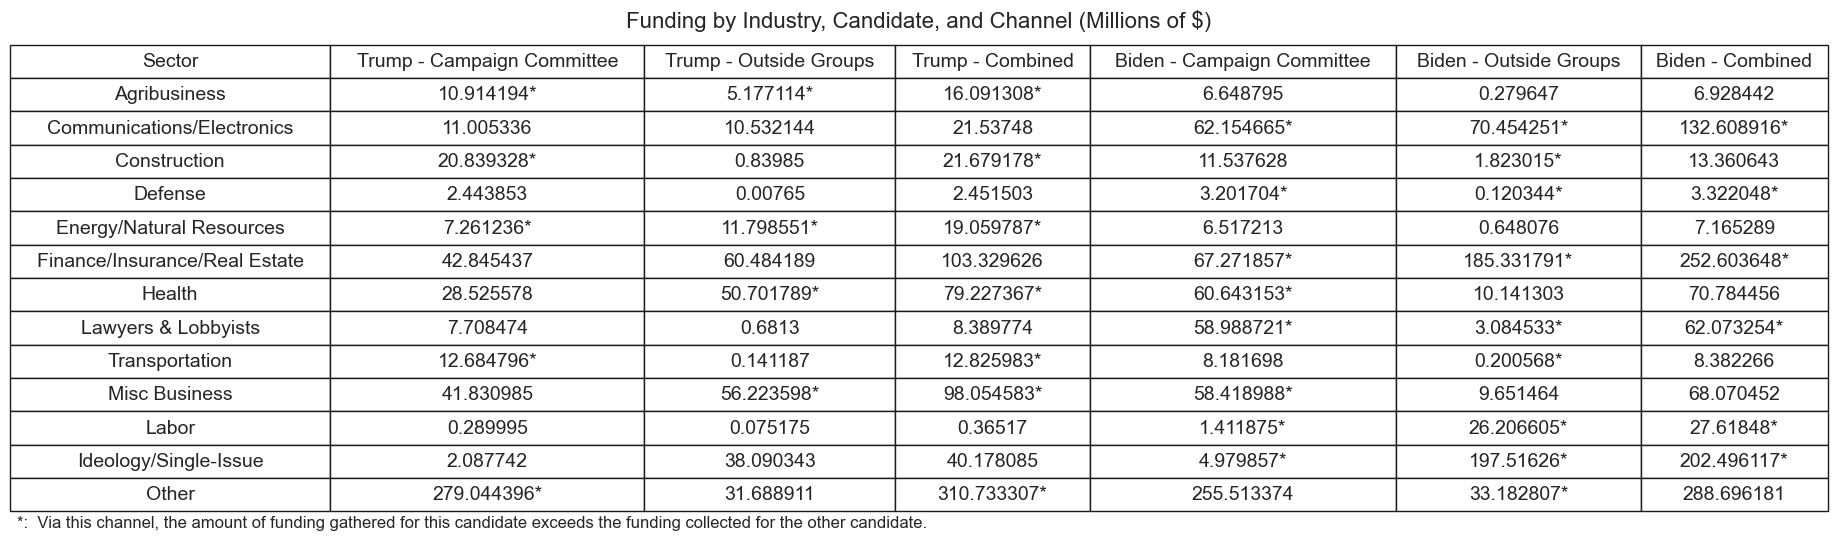

In [581]:
# TABLE
# Selecting needed rows from dataframes
trump_cc = pd.DataFrame(df1.iloc[0]).transpose()
trump_og = pd.DataFrame(df2.iloc[0]).transpose()
trump_c = pd.DataFrame(df0.iloc[0]).transpose()
biden_cc = pd.DataFrame(df1.iloc[1]).transpose()
biden_og = pd.DataFrame(df2.iloc[1]).transpose()
biden_c = pd.DataFrame(df0.iloc[1]).transpose()

# Combining all the rows to one dataframe
stacked_df = pd.concat([trump_cc, trump_og, trump_c, biden_cc, biden_og, biden_c], axis=0)
stacked_df['Candidate'] = ['Trump - Campaign Committee', 'Trump - Outside Groups', 'Trump - Combined', 'Biden - Campaign Committee', 'Biden - Outside Groups', 'Biden - Combined']
stacked_df.set_index('Candidate', inplace=True)
stacked_df = stacked_df.transpose()
stacked_df = stacked_df.reset_index().rename(columns={'index': 'Sector'})

# create function to compare and add asterisk
def add_asterisk(row):
    # compare columns 2 and 5
    if row[1] > row[4]:
        row[1] = str(row[1]) + '*'
    else:
        row[4] = str(row[4]) + '*'

    # compare columns 3 and 6
    if row[2] > row[5]:
        row[2] = str(row[2]) + '*'
    else:
        row[5] = str(row[5]) + '*'

    # compare columns 4 and 7
    if row[3] > row[6]:
        row[3] = str(row[3]) + '*'
    else:
        row[6] = str(row[6]) + '*'

    return row

# apply function to each row of dataframe
stacked_df = stacked_df.apply(add_asterisk, axis=1)

# create a figure and axis
fig, ax = plt.subplots()

# hide axis
ax.axis('off')

# create the table using the data in the dataframe
table = ax.table(cellText=stacked_df.values, colLabels=stacked_df.columns, loc='center', cellLoc='center')

# set the font size of the cells and header
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(stacked_df.columns))))

# Set the height of the cells
table.scale(1, 2)

# Set the title of the table
title = 'Funding by Industry, Candidate, and Channel (Millions of $)'
plt.text(0, 0.08, title, ha='center', va='top', fontsize=16)

# Hide the axis and turn off the axis lines and ticks
ax.axis('off')
ax.axis('tight')

# add note below the plot
note = "*:  Via this channel, the amount of funding gathered for this candidate exceeds the funding collected for the other candidate."
plt.text(-0.2, -0.075, note, ha='left', va='bottom', fontsize=12)

# Show the plot
plt.show()

To summarize the table, Trump received more funds than Biden on these sectors: Agribusiness, Construction, Energy/Natrual Resources, Health, Transportation, Misc Business, and Other; while Biden received more funds than Trump on these sectors: Communications/Electronics, Defense, Finance/Insurance/Real Estate, Lawyers & Lobbyists, Labor, and Ideology/Single-Issue.

Trump's focus on deregulation and reducing environmental protections may have made him more attractive to industries such as Agribusiness, Construction, and Energy/Natural Resources, which often face regulatory hurdles that can be costly and time-consuming. On the other hand, Biden's policies on climate change, healthcare, and workers' rights may have resonated more with the Communications/Electronics, Defense, and Labor sectors.

Furthermore, the support of certain industries for a particular candidate can also be influenced by the interests of the businesses or individuals within those industries. For instance, the Finance/Insurance/Real Estate sector may have supported Biden due to his policies on taxes and financial regulation, while the Lawyers & Lobbyists sector may have supported him due to his support for civil rights and social justice issues.

The fact that Trump received more funds than Biden in the Transportation and Health sectors could also be attributed to his administration's handling of the COVID-19 pandemic, which heavily impacted these industries. Trump's focus on reopening the economy and his skepticism towards public health measures may have resonated with certain businesses within these sectors.

Overall, the differences in funding received by Trump and Biden in different sectors highlight the complex interplay between policy positions, industry interests, and political strategy in the 2020 US Presidential election. It also suggests that different groups of voters may have been more attracted to either Trump's or Biden's policies, depending on their respective industries or personal interests.

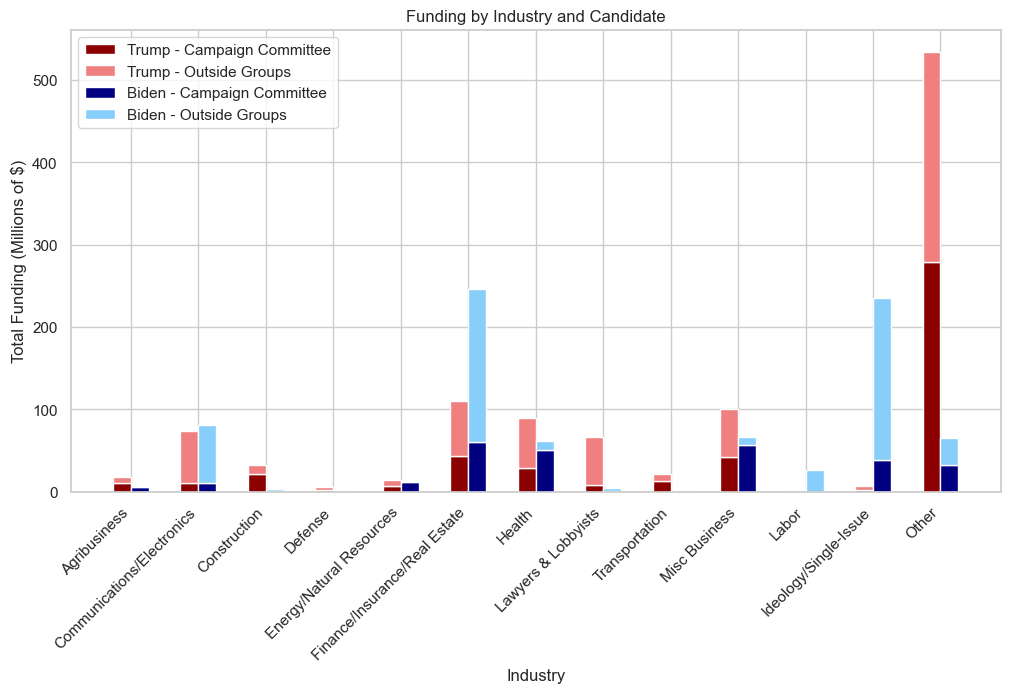

In [582]:
# PLOT
# define the column groups
groups = ['Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources',
          'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business',
          'Labor', 'Ideology/Single-Issue', 'Other']

# define the two candidates
candidates = ['Trump, Donald (R)', 'Biden, Joe (D)']

# define the x-axis positions for each group of bars
x_positions = np.arange(len(groups)) * 3

# define the bar width
bar_width = 0.8

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# define the labels for the legend
labels = ['Trump - Campaign Committee', 'Trump - Outside Groups', 'Biden - Campaign Committee', 'Biden - Outside Groups']

# loop over each group of columns
for i in range(1, df1.shape[1]):

    # get the data for this group from the two dataframes
    data1 = np.array([df1.loc[df1['Candidate'] == 'Trump, Donald (R)', df_funds[1].columns[i]].values[0],
                      df1.loc[df1['Candidate'] == 'Biden, Joe (D)', df_funds[1].columns[i]].values[0]])
    data2 = np.array([df2.loc[df2['Candidate'] == 'Trump, Donald (R)', df_funds[2].columns[i]].values[0],
                      df2.loc[df2['Candidate'] == 'Biden, Joe (D)', df_funds[2].columns[i]].values[0]])

    # calculate the x-axis positions for the two bars in this group
    x_pos_left = x_positions[i - 1] - bar_width / 2
    x_pos_right = x_positions[i - 1] + bar_width / 2

    # plot the bars for the two candidates, stacked on top of each other
    ax.bar(x_pos_left, data1[0], width=bar_width, label=labels[0], color='darkred')
    ax.bar(x_pos_left, data1[1], width=bar_width, bottom=data1[0], color='lightcoral')
    ax.bar(x_pos_right, data2[0], width=bar_width, label=labels[2], color='navy')
    ax.bar(x_pos_right, data2[1], width=bar_width, bottom=data2[0], color='lightskyblue')

# set the x-axis tick labels to be the group names
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=45, ha = 'right')

# set the legend parameters
ax.legend(labels=labels, loc='upper left', title=None)

# set the axis labels and title
ax.set_xlabel('Industry')
ax.set_ylabel('Total Funding (Millions of $)')
ax.set_title('Funding by Industry and Candidate')

# show the plot
plt.show()

From the above bar chart, for both Trump and Biden, the funding from the outside groups is almost equal to if not larger than the funding from the campaign committee. The fact is significant for several reasons, particularly in relation to the 2020 US Presidential election.

Firstly, it suggests that the official campaign committees of both Trump and Biden may have been limited in their ability to raise funds, or may have chosen to focus their efforts elsewhere, such as on grassroots organizing or digital advertising. This could reflect a shift in campaign strategy towards more decentralized, bottom-up approaches to fundraising and mobilization.

Secondly, the fact that the outside groups' funding is almost equal to or larger than the campaign committee funding for both candidates suggests that the 2020 US Presidential election was fiercely competitive and hotly contested. Both campaigns were likely aware of the importance of funding in securing victory, and may have gone to great lengths to secure support from outside groups, particularly those with deep pockets and significant influence.

Overall, the significant role played by outside groups in the 2020 US Presidential election highlights the importance of money and resources in modern political campaigns.

Another graph: pie chart of Trump and Biden

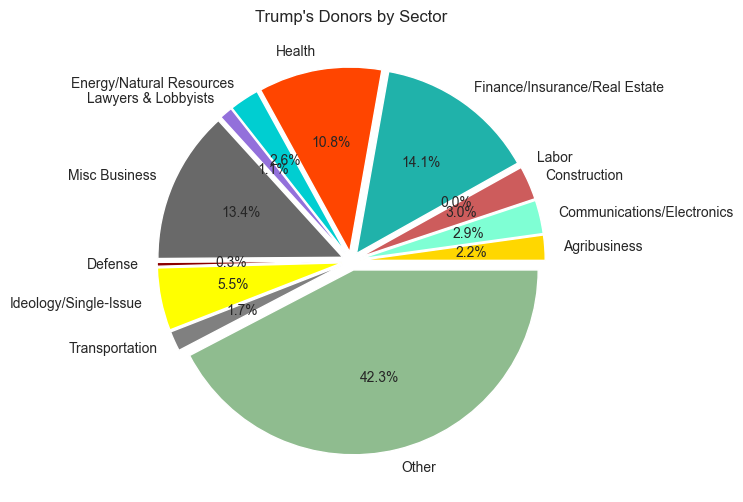

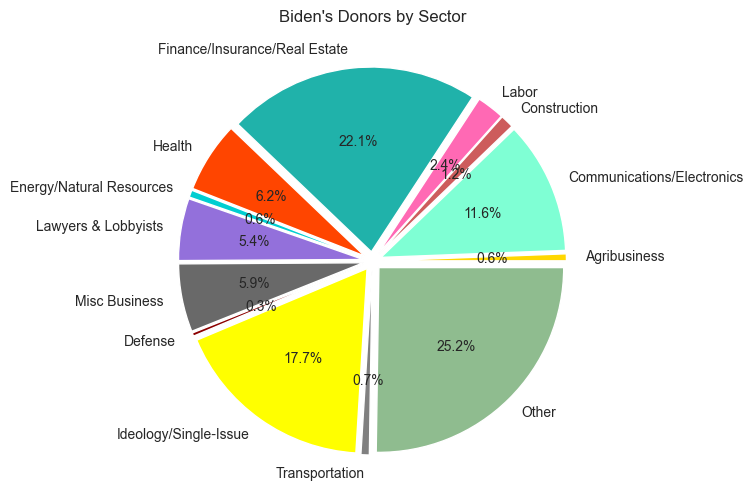

In [583]:
# Define the desired column order
new_order = ['Candidate',
             'Agribusiness', 'Communications/Electronics', 'Construction',
             'Labor', 'Finance/Insurance/Real Estate', 'Health',
             'Energy/Natural Resources', 'Lawyers & Lobbyists', 'Misc Business',
             'Defense', 'Ideology/Single-Issue', 'Transportation',
             'Other']

# Use reindex to reorder the columns
df00 = df0.reindex(columns=new_order)

# Filter data for Trump and Biden
trump_data = df00[df00['Candidate'] == 'Trump, Donald (R)'].iloc[:, 1:]
biden_data = df00[df00['Candidate'] == 'Biden, Joe (D)'].iloc[:, 1:]

# Sum contributions across sectors
trump_total = trump_data.sum(axis=0)
biden_total = biden_data.sum(axis=0)

# Set up colors for the pie chart
colors = ['#ffd700', '#7fffd4', '#cd5c5c',
          '#ff69b4', '#20b2aa', '#ff4500',
          '#00ced1', '#9370db', '#696969',
        '#8b0000', '#ffff00', '#808080',
          '#8fbc8f']

# Set up labels for the pie chart
labels_trump = trump_data.columns
labels_biden = biden_data.columns

# Set up explode parameter for the pie chart
explode_trump = [0.05] * len(labels_trump)
explode_biden = [0.05] * len(labels_biden)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(trump_total, labels=labels_trump, colors=colors, explode=explode_trump, autopct='%1.1f%%', textprops={'fontsize': 10})
ax.set_title("Trump's Donors by Sector")

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(biden_total, labels=labels_biden, colors=colors, explode=explode_biden, autopct='%1.1f%%', textprops={'fontsize': 10})
ax.set_title("Biden's Donors by Sector")

plt.show()


In the above two pie charts, it is clear that for both Trump and Biden, the Finance/Insurance/Real Estate sector is contributing substantially to the fundraising. One reason could be that this sector is intrinsically holding higher margins in their business, and the other reason could be that its business environment is heavily depending on the government's policy, so they have larger incentives to influence the result of the election.

For Trump, the Other sector stands out from all and ranked top for the highest contribution. It would be attributed to Trump's business career before he ran for the US President. As a billionaire real estate developer, he made use of the Trump Organization to provide him huge financial support for his campaign. And this contribution is categorized in the Other sector.

For Biden, the portion of Ideology/Single-Issue sector is significantly higher than its portion in Trump's funds pool. The Ideology/Single-Issue sector includes organizations that focus on a single-issue area or are heavily partisan, such as those related to abortion, gun control, healthcare, environment, and foreign policy. Therefore, the reason could be that some certain groups - which were likely taking a more liberal stance on their issue - were severely unsatisfied with Trump administration from 2016 to 2020, so that they choose to firmly support Trump's opposition, Biden, by donating to his campaign financially.

## Adding a New Dataset
New Dataset: https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project?resource=download&select=states_all.csv

Recall that the one of purposes of this paper was to study what kind of citizen would vote for Trump in the 2020 Election. From the previous discussion, we learned that Trump was more favored by people lived in the rural places, where may potentially have lower literacy level. This dataset contains the average score in grade 4, grade 8's math and reading, the latest data available is in year 2019, which can be a good approximation for analysing the literacy level of each state when the 2020 election happened.

In [584]:
df_edu = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/2019_Education_Dataset.csv')
df_edu.head()

,STATE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,230,269,212,253
1,ALASKA,232,274,204,252
2,ARIZONA,238,280,216,259
3,ARKANSAS,233,274,215,259
4,CALIFORNIA,235,276,216,259


In [585]:
df_edu_copy = df_edu.copy()
df_edu_copy['average_score'] = (df_edu_copy['AVG_MATH_4_SCORE'] + df_edu_copy['AVG_MATH_8_SCORE'] +
                                df_edu_copy['AVG_READING_4_SCORE'] + df_edu_copy['AVG_READING_8_SCORE']) / 4
df_edu_copy.drop(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
                 axis = 1, inplace = True)
df_edu_copy.iloc[:, 0] = df_edu_copy.iloc[:, 0].str.replace('_', ' ').str.title()
df_edu_copy['STATE'] = df_edu_copy['STATE'].str.replace('District Of Columbia', 'District of Columbia')
df_edu_copy.rename(columns={"STATE": "NAME"}, inplace = True)
df_edu_copy.head(10)

,NAME,average_score
0,Alabama,241.00
1,Alaska,240.50
2,Arizona,248.25
3,Arkansas,245.25
4,California,246.50
5,Colorado,254.75
6,Connecticut,255.75
7,Delaware,248.50
8,District of Columbia,242.00
9,Dodea,264.25


In [586]:
#gpd_state.drop(['average_score_x', 'average_score_y'], axis = 1, inplace = True)
gpd_state_copy = pd.merge(gpd_state, df_edu_copy, on="NAME", how="left")
gpd_state_copy.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,party,candidate,# of counties won,total_votes,average_score
0,01,01779775,0400000US01,01,AL,Alabama,00,131175477769,4591897964,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",REP,Donald Trump,54,2323304,241.00
1,04,01779777,0400000US04,04,AZ,Arizona,00,294363973043,855871553,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",REP,Donald Trump,10,3387326,248.25
2,05,00068085,0400000US05,05,AR,Arkansas,00,134660767709,3121950081,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",REP,Donald Trump,67,1219069,245.25
3,06,01779778,0400000US06,06,CA,California,00,403671756816,20293573058,"MULTIPOLYGON (((-118.59397 33.46720, -118.4847...",DEM,Joe Biden,35,17495906,246.50
4,08,01779779,0400000US08,08,CO,Colorado,00,268418796417,1185716938,"POLYGON ((-109.05996 38.49999, -109.05151 39.1...",REP,Donald Trump,40,3256953,254.75


/var/folders/ww/ygv9855j1kg902lgct5j96840000gn/T/ipykernel_26270/736268177.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(sm, ax=gax)


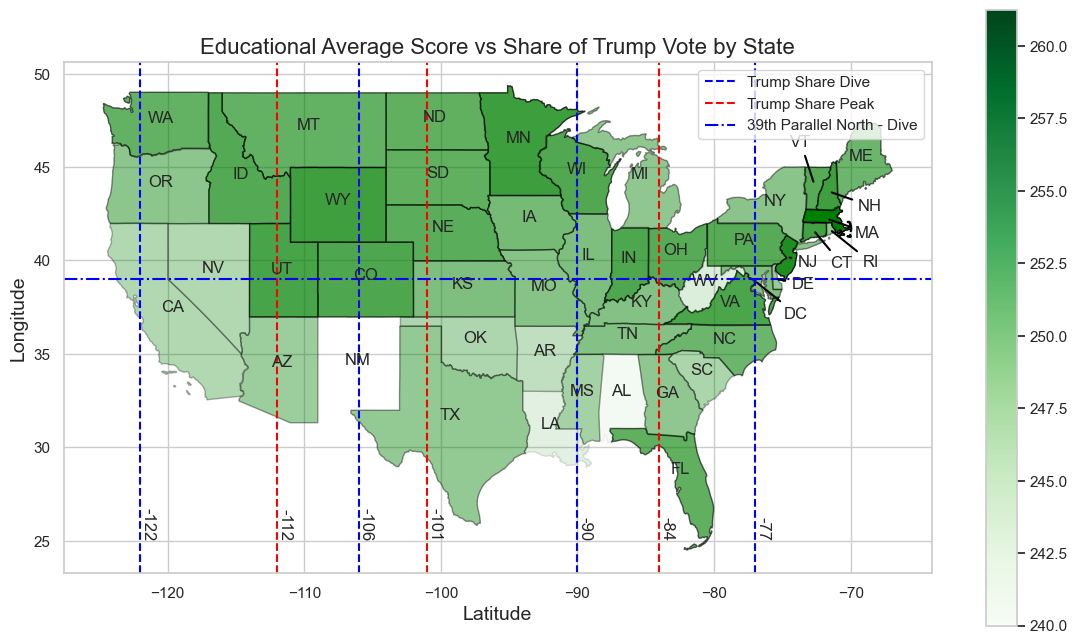

In [587]:
fig, gax= plt.subplots(figsize=(14, 8))

# Define minimum and maximum values for color scale
vmin = gpd_state_copy['average_score'].min()
vmax = gpd_state_copy['average_score'].max()

# Plot each state with the appropriate shade
for index, row in gpd_state_copy.iterrows():
    average_score = row['average_score']
    shade = (average_score - vmin) / (vmax - vmin)
    gpd_state_copy[gpd_state_copy.index == index].plot(ax=gax, color='green', edgecolor='black', linewidth=1, alpha=shade)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
plt.colorbar(sm, ax=gax)

for idx, row in gpd_state_copy.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=12, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['VT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=12, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['NJ']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=12, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['RI', 'DC']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=12, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['CT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=12, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['DE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=12, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
    else:
        gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=12)


gax.axvline(x=-122, color='blue', linestyle='dashed', label='Trump Share Dive')
gax.legend()
gax.text(-122, 25, '-122', rotation=-90, va='bottom', ha='left')
gax.axvline(x=-112, color='red', linestyle='dashed', label='Trump Share Peak')
gax.legend()
gax.text(-112, 25, '-112', rotation=-90, va='bottom', ha='left')
gax.axvline(x=-106, color='blue', linestyle='dashed')
gax.text(-106, 25, '-106', rotation=-90, va='bottom', ha='left')
gax.axvline(x=-101, color='red', linestyle='dashed')
gax.text(-101, 25, '-101', rotation=-90, va='bottom', ha='left')
gax.axvline(x=-90, color='blue', linestyle='dashed')
gax.text(-90, 25, '-90', rotation=-90, va='bottom', ha='left')
gax.axvline(x=-84, color='red', linestyle='dashed')
gax.text(-84, 25, '-84', rotation=-90, va='bottom', ha='left')
gax.axvline(x=-77, color='blue', linestyle='dashed')
gax.text(-77, 25, '-77', rotation=-90, va='bottom', ha='left')
gax.axhline(y=39, color='blue', linestyle='dashdot', label='39th Parallel North - Dive')
gax.legend()

# Set plot title
plt.title("Educational Average Score vs Share of Trump Vote by State", fontdict={'family': 'sans-serif', 'size': 16})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 14, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 14, 'weight': 'normal'})

# Set legend title
legend.set_title("Party That Wins")

# Show plot
plt.show()

When I combined the findings in Project 2 to this graph, we notice that the coorelation between literacy level and share of trump vote is weak. This shows that although Trump could be favored by the people working in the agriculture and less by the urban citizen, there is weak or no signs that people who vote for Trump has lower literacy level.

## Conclusion
In conclusion, the results of the four different electoral systems applied to the same election data reveal the significance of the electoral process in determining the outcome of an election. The outcome can vary greatly depending on the specific system being used. In this case, Joe Biden was declared the winner under Electoral System I, where each county was allotted the same number of votes as its number of voters and all votes were cast for the candidate who won the majority of votes in that county. On the other hand, Donald Trump was declared the winner in the remaining three systems - Electoral System II, III, and IV.

In [588]:
result_4 = [['I', 'Joe Biden'],
            ['II', 'Donald Trump'],
            ['III', 'Donald Trump'],
            ['IV', 'Donald Trump']]
pd.DataFrame(result_4, columns = ['Electoral System', 'Winner'])

,Electoral System,Winner
0,I,Joe Biden
1,II,Donald Trump
2,III,Donald Trump
3,IV,Donald Trump


 This highlights the importance of choosing an appropriate electoral system that aligns with the values and goals of a given society. It also demonstrates how different electoral systems can have a significant impact on the representation of different regions, communities, and individuals. The analysis shows that the design of an electoral system can greatly influence the outcome of an election and should be carefully considered.